Van der pol equation:
$$ m_1{\ddot  {x_1}}+ c_1 {\dot  {x_1}} - k_1 x_1 +  α x_1^3 +c_2({\dot{x_1}}-{\dot{x_2}}) + k_2(x_1-x_2) = \gamma \cos(\omega t)\,$$

$$ m_2{\ddot  {x_2}}+ c_2 ({\dot  {x_2}} - {\dot {x_1}})+ k_2(x_2-x_1) +c_3({\dot{x_2}}-{\dot{x_3}})+ k_3(x_2-x_3)  = \gamma \cos(\omega t)\,$$

$$ m_3{\ddot  {x_3}}+ c_3 ({\dot  {x_3}} - {\dot {x_2}})+ k_3(x_3-x_2)  = \gamma \cos(\omega t)\,$$


# Initial check

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint  # for comparison
import math
from matplotlib.pyplot import figure
from mpmath import *

In [ ]:

def model(y,t):
    m1 = 3
    m2 = 3
    c1 = 5
    c2 = 5
    k1 = 5
    k2 = 5
    alpha = 0.5
    gamma1 = 5
    gamma2 = 5
    omega1 = 10
    omega2 = 5

    x1, v1, x2, v2 = y[0], y[1], y[2], y[3]

    dx1_dt = v1
    dv1_dt = (gamma1*(math.cos(omega1*t)) -c1*v1 -c2*(v1-v2) -k1*x1 -k2*(x1-x2) -alpha*(x1**3) -alpha*((x1-x2)**3) )/m1

    dx2_dt = v2
    dv2_dt = (gamma2*(math.cos(omega2*t)) -c2*(v2-x1) -k2*(v2-x1) -alpha*((x2-x1)**3) )/m2
    

    return np.array([dx1_dt, dv1_dt, dx2_dt, dv2_dt])

In [ ]:
y0 = [1,0,1,0]


In [ ]:
def rungekutta4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i])
        k2 = f(y[i] + k1 * h / 2, t[i] + h / 2)
        k3 = f(y[i] + k2 * h / 2, t[i] + h / 2)
        k4 = f(y[i] + k3 * h, t[i] + h,)
        y[i+1] = y[i] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [ ]:
t = np.linspace(0, 50, 500)
sol = rungekutta4(model, y0, t)

<Figure size 432x288 with 0 Axes>

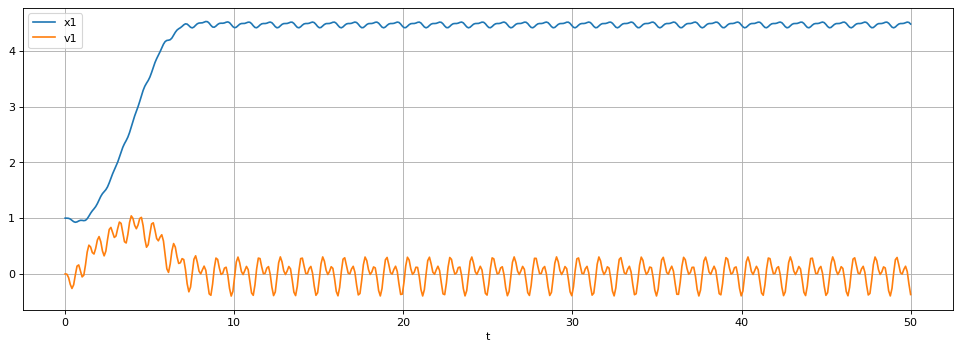

In [ ]:
plt.figure()
figure(figsize=(15, 5), dpi=80)
plt.plot(t, sol[:, 0], label='x1')
plt.plot(t, sol[:, 1], label='v1')


plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

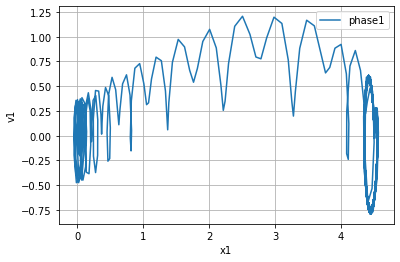

In [ ]:
plt.plot(sol[:,0],sol[:,], label='phase1')


plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('v1')
plt.grid()
plt.show()

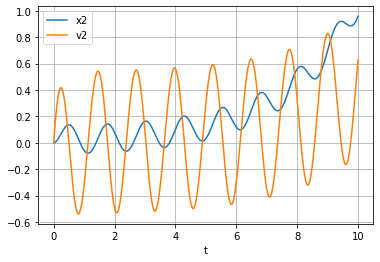

In [ ]:
plt.plot(t, sol[:, 2], label='x2')
plt.plot(t, sol[:, 3], label='v2')

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

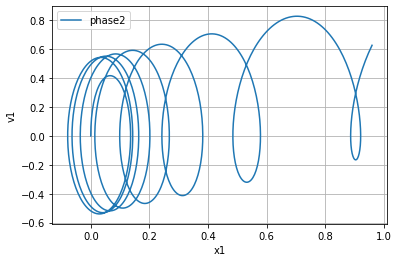

In [ ]:
plt.plot(sol[:,2],sol[:,3], label='phase2')


plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('v1')
plt.grid()
plt.show()

# Data Generation

In [ ]:
!pip install torchdiffeq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import scipy.stats as stats
from torchdiffeq import odeint
from scipy.stats import truncnorm
import torch

def generate_traj(init_cond,m1,m2,m3,c1,c2,c3,k1,k2,k3, alpha,gamma,omega, dt, len_episode):

    def ode_sys(t, X):
        x1,v1=torch.Tensor([X[0]]),torch.Tensor([X[1]])
        x2,v2=torch.Tensor([X[2]]),torch.Tensor([X[3]])
        x3,v3=torch.Tensor([X[4]]),torch.Tensor([X[5]])


        dx1_dt = v1
        dv1_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c1*v1 + k1*x1 -c2*(v1-v2) -k2*(x1-x2) -alpha*(x1**3)) /m1])

        dx2_dt = v2
        dv2_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c2*(v2-v1) - k2*(x2-x1) -c3*(v2-v3) - k3*(x2-x3) ) /m2])

        dx3_dt = v3
        dv3_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c3*(v3-v2) - k3*(x3-x2)) /m3])

        

        return torch.cat([dx1_dt, dv1_dt, dx2_dt, dv2_dt,dx3_dt, dv3_dt])

        
    t = torch.Tensor(np.linspace(0.0, dt*(len_episode-1), len_episode))


    #num_sol = odeint(ode_sys, torch.cat([x_init, dxdt_init]), torch.Tensor(t_space)).numpy()
    
    sol = odeint(ode_sys,init_cond,t, method = 'euler').numpy()
    
    return t, sol  


In [ ]:
def generate_data(rng, n_samples, range_init_x1,range_init_v1,range_init_x2,range_init_v2,
                  range_init_x3,range_init_v3,range_m1, range_m2,range_m3,
                  range_c1, range_c2,range_c3,range_k1,range_k2, range_k3,
                  range_alpha, range_gamma, range_omega,dt, len_episode, noise_std,
                  bound_x1,bound_v1,bound_m1,bound_c1,bound_k1,bound_x2,bound_v2,bound_m2,bound_c2,bound_k2,
                  bound_x3,bound_v3,bound_m3,bound_c3,bound_k3):
  
      x1_a,x1_b = (bound_x1[0]-range_init_x1[0])/range_init_x1[1] , (bound_x1[1]-range_init_x1[0])/range_init_x1[1]
      v1_a,v1_b = (bound_v1[0]-range_init_v1[0])/range_init_v1[1] , (bound_v1[1]-range_init_v1[0])/range_init_v1[1]
      m1_a,m1_b = (bound_m1[0]-range_m1[0])/range_m1[1] , (bound_m1[1]-range_m1[0])/range_m1[1]
      c1_a,c1_b = (bound_c1[0]-range_c1[0])/range_c1[1] , (bound_c1[1]-range_c1[0])/range_c1[1]
      k1_a,k1_b = (bound_k1[0]-range_k1[0])/range_k1[1] , (bound_k1[1]-range_k1[0])/range_k1[1]

      x2_a,x2_b = (bound_x2[0]-range_init_x2[0])/range_init_x2[1] , (bound_x2[1]-range_init_x2[0])/range_init_x2[1]
      v2_a,v2_b = (bound_v2[0]-range_init_v2[0])/range_init_v2[1] , (bound_v2[1]-range_init_v2[0])/range_init_v2[1]
      m2_a,m2_b = (bound_m2[0]-range_m2[0])/range_m2[1] , (bound_m2[1]-range_m2[0])/range_m2[1]
      c2_a,c2_b = (bound_c2[0]-range_c2[0])/range_c2[1] , (bound_c2[1]-range_c2[0])/range_c2[1]
      k2_a,k2_b = (bound_k2[0]-range_k2[0])/range_k2[1] , (bound_k2[1]-range_k2[0])/range_k2[1]

      x3_a,x3_b = (bound_x3[0]-range_init_x3[0])/range_init_x3[1] , (bound_x3[1]-range_init_x3[0])/range_init_x3[1]
      v3_a,v3_b = (bound_v3[0]-range_init_v3[0])/range_init_v3[1] , (bound_v3[1]-range_init_v3[0])/range_init_v3[1]
      m3_a,m3_b = (bound_m3[0]-range_m3[0])/range_m3[1] , (bound_m3[1]-range_m3[0])/range_m3[1]
      c3_a,c3_b = (bound_c3[0]-range_c3[0])/range_c3[1] , (bound_c3[1]-range_c3[0])/range_c3[1]
      k3_a,k3_b = (bound_k3[0]-range_k3[0])/range_k3[1] , (bound_k3[1]-range_k3[0])/range_k3[1]

      
      init_x1 = torch.Tensor(stats.truncnorm.rvs(x1_a,x1_b,loc=range_init_x1[0], scale=range_init_x1[1], size=n_samples ))
      init_v1 = torch.Tensor(stats.truncnorm.rvs(v1_a,v1_b,loc=range_init_v1[0], scale=range_init_v1[1], size=n_samples ))
      init_x2 = torch.Tensor(stats.truncnorm.rvs(x2_a,x2_b,loc=range_init_x2[0], scale=range_init_x2[1], size=n_samples ))
      init_v2 = torch.Tensor(stats.truncnorm.rvs(v2_a,v2_b,loc=range_init_v2[0], scale=range_init_v2[1], size=n_samples ))
      init_x3 = torch.Tensor(stats.truncnorm.rvs(x3_a,x3_b,loc=range_init_x3[0], scale=range_init_x3[1], size=n_samples ))
      init_v3 = torch.Tensor(stats.truncnorm.rvs(v3_a,v3_b,loc=range_init_v3[0], scale=range_init_v3[1], size=n_samples ))


      m1 = torch.Tensor(stats.truncnorm.rvs(m1_a,m1_b,loc=range_m1[0], scale=range_m1[1], size=n_samples ))
      m2 = torch.Tensor(stats.truncnorm.rvs(m2_a,m2_b,loc=range_m2[0], scale=range_m2[1], size=n_samples ))
      m3 = torch.Tensor(stats.truncnorm.rvs(m3_a,m3_b,loc=range_m3[0], scale=range_m3[1], size=n_samples ))
      #torch.Tensor(stats.truncnorm.rvs(c_a,c_b,loc=range_c[0], scale=range_c[1], size=n_samples ))
      c1 = torch.Tensor(stats.truncnorm.rvs(c1_a,c1_b,loc=range_c1[0], scale=range_c1[1], size=n_samples ))
      c2 = torch.Tensor(stats.truncnorm.rvs(c2_a,c2_b,loc=range_c2[0], scale=range_c2[1], size=n_samples ))
      c3 = torch.Tensor(stats.truncnorm.rvs(c3_a,c3_b,loc=range_c3[0], scale=range_c3[1], size=n_samples ))
      k1 = torch.Tensor(stats.truncnorm.rvs(k1_a,k1_b,loc=range_k1[0], scale=range_k1[1], size=n_samples ))
      k2 = torch.Tensor(stats.truncnorm.rvs(k2_a,k2_b,loc=range_k2[0], scale=range_k2[1], size=n_samples ))
      k3 = torch.Tensor(stats.truncnorm.rvs(k3_a,k3_b,loc=range_k3[0], scale=range_k3[1], size=n_samples ))
      alpha = torch.Tensor(np.random.normal(loc=range_alpha[0], scale=range_alpha[1], size=n_samples))
      gamma = torch.Tensor(np.random.normal(loc=range_gamma[0], scale=range_gamma[1], size=n_samples))
      omega = torch.Tensor(np.random.normal(loc=range_omega[0], scale=range_omega[1], size=n_samples))

      # solve ODE
      x = np.empty((n_samples, len_episode,6))      

      for i in range(n_samples):
          init_cond= torch.cat([init_x1[[i]],init_v1[[i]],init_x2[[i]],init_v2[[i]],init_x3[[i]],init_v3[[i]]])
          t, x_i = generate_traj(init_cond,
                                m1[i],m2[i],m3[i],c1[i],c2[i],c3[i],
                                k1[i],k2[i],k3[i],alpha[i],gamma[i],omega[i], dt, len_episode)
          #print(x_i.shape)
          
          x[i,:,:] = x_i
          #print(x.shape)

      # observation noise
      x = x + rng.normal(loc=0.0, scale=noise_std, size=x.shape)

      return t, x,init_x1,init_v1,init_x2,init_v2,init_x3,init_v3,m1,m2,m3,c1,c2,c3,k1,k2,k3,alpha,gamma,omega


In [ ]:
# save data
def save_data(name,data,init_x1,init_v1,init_x2,init_v2,init_x3,init_v3,m1,m2,m3,c1,c2,c3,k1,k2,k3,  alpha, gamma, omega):
  np.save('data_{}.npy'.format(name),data)
  print("saved data")

  #np.savetxt('data_{}.txt'.format(name), data)
  


  # save true parameters
  np.savetxt('true_params_{}.txt'.format(name),
      np.stack([init_x1,init_v1,init_x2,init_v2,init_x3,init_v3,m1,m2,m3,c1,c2,c3,k1,k2,k3,  alpha, gamma, omega ], axis=1), fmt='%.9e',
      header='[init_x1, init_v1, init_x2, init_v2, init_x3, init_v3, m1, m2, m3, c1, c2, c3, k1, k2, k3, alpha, gamma, omega')
  print('saved true parameters')


In [ ]:

# len_episode= 400  # time = len_episode * dt
# range_init_x= [0.01,0.002]    
# range_init_v=  [0.01,0.002]  
# range_m= [50,1.25]
# range_c= [20,2] 
# range_k= [1000,150]
# range_alpha= [100,0]
# range_gamma=  [500,0]  
# range_omega= [2.5,0] 
# bound_x = [0.004,0.016]
# bound_v = [0.004,0.016]
# bound_m = [46.25,53.75]
# bound_c = [14,26]
# bound_k = [550,1450]


In [ ]:
len_episode=400  # time = len_episode * dt
range_init_x1= [0.1,0.01]
range_init_v1= [0.1,0.01]
range_init_x2= [0.1,0.01]
range_init_v2= [0.1,0.01]
range_init_x3= [0.2,0.02]
range_init_v3= [0.2,0.02]
range_m1 = [50,2.5]
range_m2 = [50,2.5]
range_m3 = [30,1.5]

range_c1 = [25,2.5]
range_c2 = [25,2.5]
range_c3 = [20,2]

range_k1 = [1000,150]
range_k2 = [1000,150]
range_k3 = [500,75]

range_alpha = [100,0]
range_gamma = [50,0]
range_omega = [10,0]


In [ ]:
bound_x1 = [range_init_x1[0]-3*range_init_x1[1],range_init_x1[0]+3*range_init_x1[1]]
bound_v1 = [range_init_v1[0]-3*range_init_v1[1],range_init_v1[0]+3*range_init_v1[1]]
bound_m1 = [range_m1[0]-3*range_m1[1], range_m1[0]+3*range_m1[1]]
bound_c1 = [range_c1[0]-3*range_c1[1], range_c1[0]+3*range_c1[1]]
bound_k1 = [range_k1[0]-3*range_k1[1], range_k1[0]+3*range_k1[1]]

bound_x2 = [range_init_x2[0]-3*range_init_x2[1],range_init_x2[0]+3*range_init_x2[1]]
bound_v2 = [range_init_v2[0]-3*range_init_v2[1],range_init_v2[0]+3*range_init_v2[1]]
bound_m2 = [range_m2[0]-3*range_m2[1], range_m2[0]+3*range_m2[1]]
bound_c2 = [range_c2[0]-3*range_c2[1], range_c2[0]+3*range_c2[1]]
bound_k2 = [range_k2[0]-3*range_k2[1], range_k2[0]+3*range_k2[1]]

bound_x3 = [range_init_x3[0]-3*range_init_x3[1],range_init_x3[0]+3*range_init_x3[1]]
bound_v3 = [range_init_v3[0]-3*range_init_v3[1],range_init_v3[0]+3*range_init_v3[1]]
bound_m3 = [range_m3[0]-3*range_m3[1], range_m3[0]+3*range_m3[1]]
bound_c3 = [range_c3[0]-3*range_c3[1], range_c3[0]+3*range_c3[1]]
bound_k3 = [range_k3[0]-3*range_k3[1], range_k3[0]+3*range_k3[1]]


In [ ]:

dt=0.01
noise_std=0.001
kwargs = {'range_init_x1': range_init_x1, 'range_init_v1': range_init_v1, 'range_init_x2': range_init_x2, 
          'range_init_v2': range_init_v2,'range_init_x3': range_init_x3,  'range_init_v3': range_init_v3,        

          'range_m1': range_m1,'range_m2': range_m2,'range_m3': range_m3,
          'range_c1': range_c1,'range_c2': range_c2,'range_c3': range_c3,
          'range_k1': range_k1,'range_k2': range_k2,'range_k3': range_k3,
          'range_alpha': range_alpha,'range_gamma': range_gamma,'range_omega': range_omega,          
          'dt': dt, 'len_episode':len_episode, 'noise_std':noise_std,
          'bound_x1':bound_x1, 'bound_v1':bound_v1, 'bound_m1':bound_m1,'bound_c1':bound_c1, 'bound_k1':bound_k1,
          'bound_x2':bound_x2, 'bound_v2':bound_v2, 'bound_m2':bound_m2,'bound_c2':bound_c2, 'bound_k2':bound_k2,
          'bound_x3':bound_x3, 'bound_v3':bound_v3, 'bound_m3':bound_m3,'bound_c3':bound_c3, 'bound_k3':bound_k3}


In [ ]:
## function to choose between training,test and validation data

def data_divider(name):
  if name == "train":
    rng_param=1236
    n_samples=500
    return rng_param,n_samples,name

    
  elif name == "valid":
    rng_param=1235
    n_samples=50
    return rng_param,n_samples,name    
  
  else:
    print("invalid input")
  

In [ ]:
##Write "train", "test". or "validation for generating data"
rng_param, n_samples,name=data_divider("train")
print(rng_param)
print(n_samples)
print(name)


1236
500
train


In [ ]:
#generating and saving the data  
t, data,init_x1,init_v1,init_x2,init_v2,init_x3,init_v3,m1,m2,m3,c1,c2,c3, k1,k2,k3,alpha,gamma,omega= generate_data(np.random.default_rng(rng_param), n_samples, **kwargs)
#saving data
save_data(name, data,init_x1,init_v1,init_x2,init_v2,init_x3,init_v3,m1,m2,m3,c1,c2,c3,k1,k2,k3,  alpha, gamma, omega)

saved data
saved true parameters


storing min-max values

In [ ]:
data_params = np.loadtxt('true_params_train.txt')
data_params.shape

(500, 18)

In [ ]:
init_x1 = data_params[:,0]
init_v1 =data_params[:,1]
init_x2 =data_params[:,2]
init_v2=data_params[:,3] 
init_x3 =data_params[:,4]
init_v3 =data_params[:,5]


m1 =data_params[:,6]
m2 =data_params[:,7]
m3 =data_params[:,8]

c1 =data_params[:,9]
c2 =data_params[:,10]
c3 =data_params[:,11]

k1 =data_params[:,12]
k2 =data_params[:,13]
k3 =data_params[:,14]

alpha =data_params[:,15]
gamma =data_params[:,16]
omega =data_params[:,17]

In [ ]:
x1_o_min = init_x1.min()
x1_o_max = init_x1.max() 
v1_o_min = init_v1.min()
v1_o_max = init_v1.max() 
x2_o_min = init_x2.min()
x2_o_max = init_x2.max() 
v2_o_min = init_v2.min()
v2_o_max = init_v2.max() 
x3_o_min = init_x3.min()
x3_o_max = init_x3.max() 
v3_o_min = init_v3.min()
v3_o_max = init_v3.max() 


m1_o_min = m1.min()
m1_o_max = m1.max()
m2_o_min = m2.min()
m2_o_max = m2.max()
m3_o_min = m3.min()
m3_o_max = m3.max()


c1_o_min = c1.min()
c1_o_max = c1.max()
c2_o_min = c2.min()
c2_o_max = c2.max()
c3_o_min = c3.min()
c3_o_max = c3.max()


k1_o_min = k1.min()
k1_o_max = k1.max()
k2_o_min = k2.min()
k2_o_max = k2.max()
k3_o_min = k3.min()
k3_o_max = k3.max()


In [ ]:
##Write "train", "test". or "validation for generating data"
rng_param, n_samples,name=data_divider("valid")
print(rng_param)
print(n_samples)
print(name)

1235
50
valid


In [ ]:
#generating and saving the data  
tv, datav,init_x1v,init_v1v,init_x2v,init_v2v,init_x3v,init_v3v,m1v,m2v,m3v,c1v,c2v,c3v, k1v,k2v,k3v,alphav,gammav,omegav= generate_data(np.random.default_rng(rng_param), n_samples, **kwargs)
#saving data
save_data(name, data,init_x1v,init_v1v,init_x2v,init_v2v,init_x3v,init_v3v,m1v,m2v,m3v,c1v,c2v,c3v, k1v,k2v,k3v,alphav,gammav,omegav)

saved data
saved true parameters


In [ ]:
data_train_1 = np.load('data_train.npy')

In [ ]:
data_train_1.shape

(500, 400, 6)

In [ ]:
data_train_dis1 = data_train_1[:,:,0]

data_train_dis2 = data_train_1[:,:,2]

data_train_dis3 = data_train_1[:,:,4]


<Figure size 432x288 with 0 Axes>

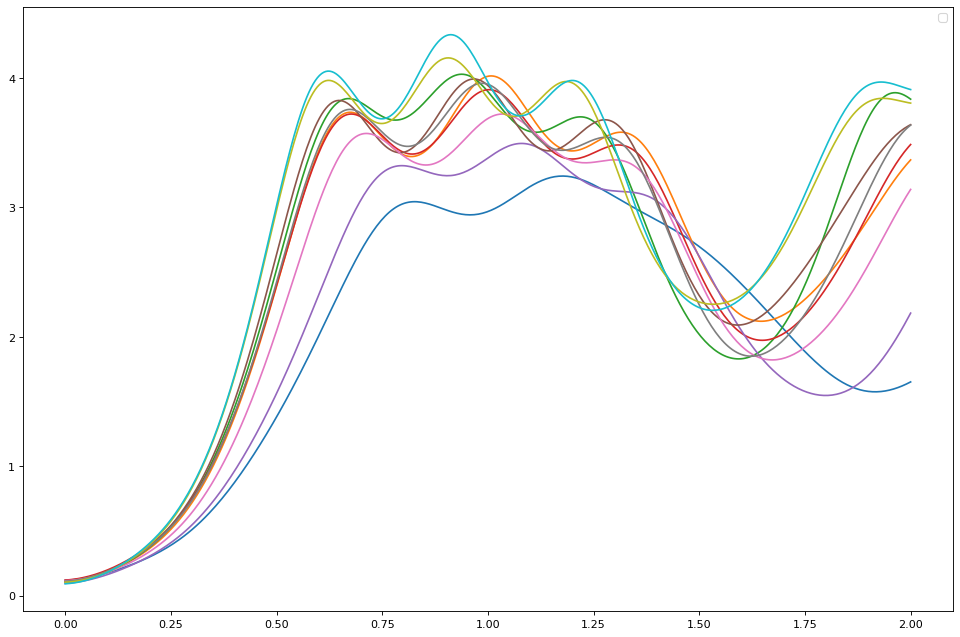

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
t = np.linspace(0.0, 2,400)
# show
idx =0
plt.figure()
figure(figsize=(15, 10), dpi=80)
for i in range(10):
    plt.plot(t,data_train_dis1[i])
    #plt.plot(t,data_train_vel1[i])
    
    #plt.ylim([-2.0, 2.0])
plt.legend(loc='upper right',fontsize=10)
plt.show()

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

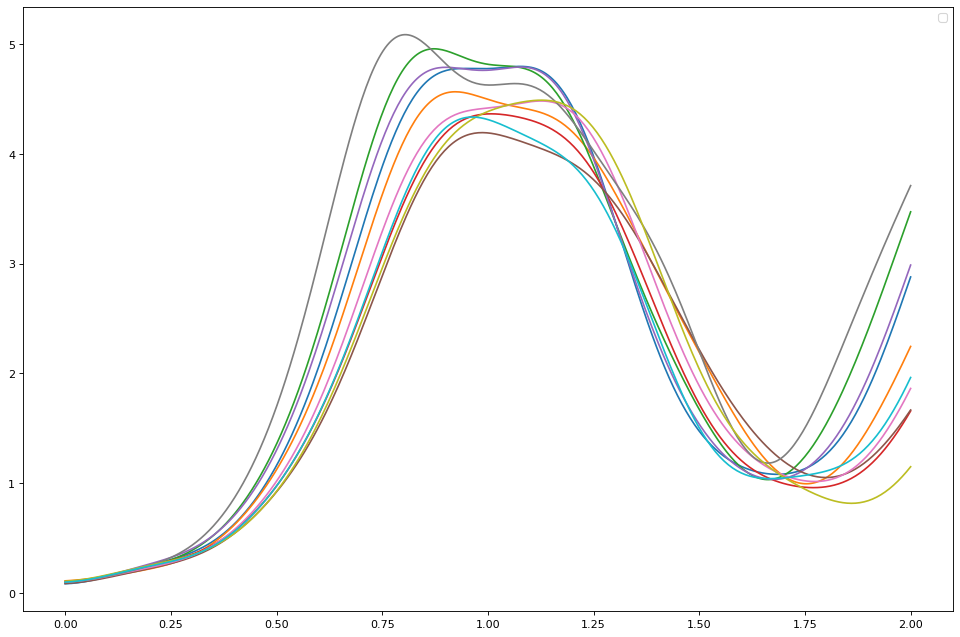

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# t = np.linspace(0.0, 2.5, 50)
# show
idx =0
plt.figure()
figure(figsize=(15, 10), dpi=80)

for i in range(10):
    plt.plot(t,data_train_dis2[i])
    #plt.plot(t,data_train_vel2[i])
    
    #plt.ylim([-2.0, 2.0])
plt.legend(loc='upper right',fontsize=10)
plt.show()

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

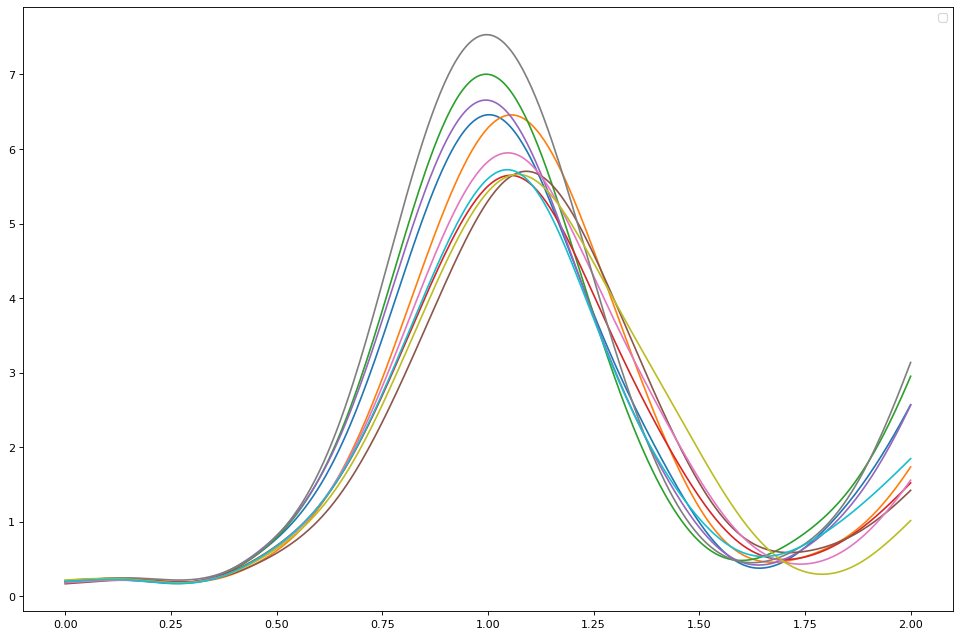

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#t = np.linspace(0.0, 2.5, 50)
# show
idx =0
plt.figure()
figure(figsize=(15, 10), dpi=80)

for i in range(10):
    plt.plot(t,data_train_dis3[i])
    #plt.plot(t,data_train_vel3[i])
    
    #plt.ylim([-2.0, 2.0])
plt.legend(loc='upper right',fontsize=10)
plt.show()

In [ ]:
cf_x1_true_dis_std =[]
cf_x1_true_dis_T = data_train_dis1.T
for y in cf_x1_true_dis_T:
   #print(x.shape)
    cf_x1_true_dis_std.append(y.var())

cf_x2_true_dis_std =[]
cf_x2_true_dis_T = data_train_dis2.T
for y in cf_x2_true_dis_T:
   #print(x.shape)
    cf_x2_true_dis_std.append(y.var())


cf_x3_true_dis_std =[]
cf_x3_true_dis_T = data_train_dis3.T
for y in cf_x3_true_dis_T:
   #print(x.shape)
    cf_x3_true_dis_std.append(y.var())




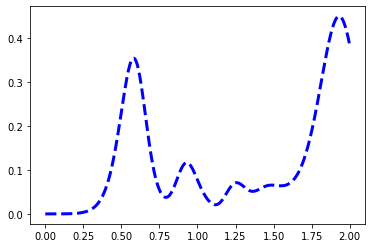

In [ ]:
plt.plot(t,cf_x1_true_dis_std,color='blue',linestyle='dashed',linewidth =3 ,label="Ground Truth variance")

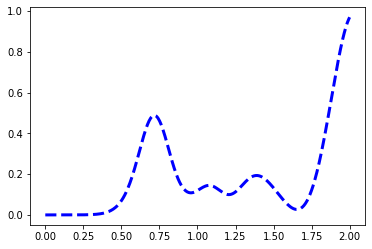

In [ ]:
plt.plot(t,cf_x2_true_dis_std,color='blue',linestyle='dashed',linewidth =3 ,label="Ground Truth variance")

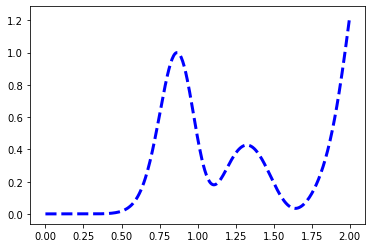

In [ ]:

plt.plot(t,cf_x3_true_dis_std,color='blue',linestyle='dashed',linewidth =3 ,label="Ground Truth variance")

# Normalizing data

In [ ]:
x1_new = (init_x1-x1_o_min)/(x1_o_max - x1_o_min)
v1_new = (init_v1-v1_o_min)/(v1_o_max - v1_o_min)
m1_new = (m1-m1_o_min)/(m1_o_max - m1_o_min)
c1_new = (c1-c1_o_min)/(c1_o_max - c1_o_min)
k1_new = (k1-k1_o_min)/(k1_o_max - k1_o_min)

x2_new = (init_x2-x2_o_min)/(x2_o_max - x2_o_min)
v2_new = (init_v2-v2_o_min)/(v2_o_max - v2_o_min)
m2_new = (m2-m2_o_min)/(m2_o_max - m2_o_min)
c2_new = (c2-c2_o_min)/(c2_o_max - c2_o_min)
k2_new = (k2-k2_o_min)/(k2_o_max - k2_o_min)

x3_new = (init_x3-x3_o_min)/(x3_o_max - x3_o_min)
v3_new = (init_v3-v3_o_min)/(v3_o_max - v3_o_min)
m3_new = (m3-m3_o_min)/(m3_o_max - m3_o_min)
c3_new = (c3-c3_o_min)/(c3_o_max - c3_o_min)
k3_new = (k3-k3_o_min)/(k3_o_max - k3_o_min)



In [ ]:

x1_mean = x1_new.mean() 
x1_std = x1_new.std()
v1_mean = v1_new.mean() 
v1_std = v1_new.std()
m1_mean = m1_new.mean() 
m1_std = m1_new.std()
c1_mean = c1_new.mean() 
c1_std = c1_new.std()
k1_mean = k1_new.mean() 
k1_std = k1_new.std()


x2_mean = x2_new.mean() 
x2_std = x2_new.std()
v2_mean = v2_new.mean() 
v2_std = v2_new.std()
m2_mean = m2_new.mean() 
m2_std = m2_new.std()
c2_mean = c2_new.mean() 
c2_std = c2_new.std()
k2_mean = k2_new.mean() 
k2_std = k2_new.std()


x3_mean = x3_new.mean() 
x3_std = x3_new.std()
v3_mean = v3_new.mean() 
v3_std = v3_new.std()
m3_mean = m3_new.mean() 
m3_std = m3_new.std()
c3_mean = c3_new.mean() 
c3_std = c3_new.std()
k3_mean = k3_new.mean() 
k3_std = k3_new.std()


In [ ]:
lower_x1 = x1_new.min()
upper_x1 = x1_new.max() 
lower_v1 = v1_new.min()
upper_v1 = v1_new.max() 
lower_m1 = 1e-6
upper_m1 = m1_new.max() 
lower_c1 = c1_new.min() 
upper_c1 = c1_new.max() 
lower_k1 = k1_new.min() 
upper_k1 = k1_new.max() 

lower_x2 = x2_new.min()
upper_x2 = x2_new.max() 
lower_v2 = v2_new.min()
upper_v2 = v2_new.max() 
lower_m2 = 1e-6
upper_m2 = m2_new.max() 
lower_c2 = c2_new.min() 
upper_c2 = c2_new.max() 
lower_k2 = k2_new.min() 
upper_k2 = k2_new.max() 

lower_x3 = x3_new.min()
upper_x3 = x3_new.max() 
lower_v3 = v3_new.min()
upper_v3 = v3_new.max() 
lower_m3 = 1e-6
upper_m3 = m3_new.max() 
lower_c3 = c3_new.min() 
upper_c3 = c3_new.max() 
lower_k3 = k3_new.min() 
upper_k3 = k3_new.max() 
 

# Load data

In [ ]:
data_train_1.shape

(500, 400, 6)

In [ ]:
import numpy as np

data_train_1 = np.load('data_train.npy')

data_train_dis1 = data_train_1[:,:,0]
data_train_dis2 = data_train_1[:,:,2]
data_train_dis3 = data_train_1[:,:,4]



In [ ]:
# load training/validation data for 1st DOF
data_valid_1 = np.load('data_valid.npy')


data_valid_dis1 = data_valid_1[:,:,0]
data_valid_dis2 = data_valid_1[:,:,2]
data_valid_dis3 = data_valid_1[:,:,4]



# Helper functions

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


def actmodule(activation:str):
    if activation == 'softplus':
        return nn.Softplus()
    elif activation == 'relu':
        return nn.ReLU()
    elif activation == 'leakyrelu':
        return nn.LeakyReLU()
    elif activation == 'prelu':
        return nn.PReLU()
    elif activation == 'elu':
        return nn.ELU()
    elif activation == 'tanh':
        return nn.Tanh()
    else:
        raise ValueError('unknown activation function specified')



def kernel_mat_gauss(sample:torch.Tensor, width:float):
    # https://discuss.pytorch.org/t/efficient-distance-matrix-computation/9065/
    #euclidean norm
    norm = (sample**2).sum(1).view(-1, 1)
    #distance matrix
    dist_mat = norm + norm.view(1,-1) - 2.0 * torch.mm(sample, torch.transpose(sample,0,1))
    dist_mat[dist_mat != dist_mat] = 0.0
    # width = torch.max(torch.ones(1,device=sample.device)*1e-4, torch.median(dist_mat).detach())
    return torch.exp(-dist_mat / width)



def hsic(kmat1:torch.Tensor, kmat2:torch.Tensor):
    """
    Unbiased estimator of HSIC [Song+ ICML 2007]
    """
    m = kmat1.shape[0]
    assert m>3
    device = kmat1.device
    K1 = (1.0 - torch.eye(m, device=device)) * kmat1
    K2 = (1.0 - torch.eye(m, device=device)) * kmat2
    return ( torch.sum(K1*K2.T) + torch.sum(K1)*torch.sum(K2)/(m-1)/(m-2) \
            - torch.sum(torch.sum(K1,dim=0)*torch.sum(K2,dim=1))*2/(m-2) ) / m / (m-3)



def mmd(kmat11:torch.Tensor, kmat22:torch.Tensor, kmat12:torch.Tensor):
    """
    Estimator of MMD
    """
    m1 = kmat11.shape[0]
    m2 = kmat22.shape[0]
    return torch.sum(kmat11)/m1/m1 + torch.sum(kmat22)/m2/m2 - 2.0*torch.sum(kmat12)/m1/m2


def nll_normal(data:torch.Tensor, mean:torch.Tensor, lnvar:torch.Tensor):
    """
    Negative log likelihood based on normal observation model, -log N(data | mean1, diag(exp(lnvar)))
    """
    d = data.shape[1]
    if lnvar.ndim==2:
        nll = 0.5*d*1.8379 + 0.5*torch.sum((data-mean).pow(2)/lnvar.exp(), dim=1) + 0.5*torch.sum(lnvar, dim=1)
    else:
        nll = 0.5*d*1.8379 + 0.5*torch.sum((data-mean).pow(2), dim=1)/lnvar.exp() + 0.5*d*lnvar
    return nll



def kldiv_logits_logits(logits1:torch.Tensor, logits2:torch.Tensor):
    """
    KL divergence between categorical distributions represented by sets of logits
    """
    # KL(q(z_phy|x) or p(z_phy) || p(z_phy))
    #   = \sum_i q_i (logit_q_i - logit_p_i) - (lse(logits_q) - lse(logits_p))
    logits1_logsumexp = torch.logsumexp(logits1, dim=1)
    logits2_logsumexp = torch.logsumexp(logits2, dim=1)
    probs1 = torch.exp(logits1 - logits1_logsumexp.unsqueeze(1))
    return torch.sum(probs1 * (logits1-logits2), dim=1) - (logits1_logsumexp-logits2_logsumexp)



def kldiv_normal_normal(mean1:torch.Tensor, lnvar1:torch.Tensor, mean2:torch.Tensor, lnvar2:torch.Tensor):
    """
    KL divergence between normal distributions, KL( N(mean1, diag(exp(lnvar1))) || N(mean2, diag(exp(lnvar2))) )
    """
    if lnvar1.ndim==2 and lnvar2.ndim==2:

        return 0.5 * torch.sum((lnvar1-lnvar2).exp() - 1.0 + lnvar2 - lnvar1 + (mean2-mean1).pow(2)/lnvar2.exp(), dim=1)
        
    elif lnvar1.ndim==1 and lnvar2.ndim==1:
        d = mean1.shape[1]
        return 0.5 * (d*((lnvar1-lnvar2).exp() - 1.0 + lnvar2 - lnvar1) + torch.sum((mean2-mean1).pow(2), dim=1)/lnvar2.exp())
    else:
        raise ValueError()



def pdfratio_normal(data:torch.Tensor, mean1:torch.Tensor, lnvar1:torch.Tensor, mean2:torch.Tensor, lnvar2:torch.Tensor):
    """
    Value of ratio of pdfs, N(mean1, diag(exp(lnvar1))) / N(mean2, diag(exp(lnvar2)))
    """
    lnpdf1 = -nll_normal(data, mean1, lnvar1)
    lnpdf2 = -nll_normal(data, mean2, lnvar2)
    return torch.exp(lnpdf1 - lnpdf2)


def draw_normal(mean:torch.Tensor, lnvar:torch.Tensor):
    std = torch.exp(0.5*lnvar)
    eps = torch.randn_like(std) # reparametrization trick
    return mean + eps*std


#for plotting 

def set_default(figsize=(0, 10), dpi=100):    
    plt.rc('axes', facecolor='white')
    plt.rc('figure', facecolor='white')
    plt.rc('figure', figsize=figsize, dpi=dpi)


# Define device

In [ ]:
cuda = False and torch.cuda.is_available()
device = torch.device("cpu")
device

device(type='cpu')

# MLP

In [ ]:
import torch
import torch.nn as nn

#from . import utils
# import utils


class MLP(nn.Module):
    """Multi-layer perceptron.
    """
    def __init__(self, dims_all:list, activation:str,
                 dropout:float=0.6, batchnorm:bool=False, actfun_output:bool=False, binary_output:bool=False):
        super(MLP, self).__init__()

        modules = []

        # from first to second-last layer
        for i in range(len(dims_all)-2):
            # fully-connected
            modules.append(nn.Linear(dims_all[i], dims_all[i+1]))
            # batch normalization if any
            if batchnorm:
                modules.append(nn.BatchNorm1d(dims_all[i+1]))
            # nonlinear activation
            modules.append(activation)
            # dropout if any
            if dropout>0.0:
                modules.append(nn.Dropout(p=dropout))

        # last layer
        modules.append(nn.Linear(dims_all[-2], dims_all[-1]))
        if actfun_output:
            modules.append(activation)
        if binary_output:
            modules.append(nn.Sigmoid())

        self.net = nn.Sequential(*modules)
        self.dim_in = dims_all[0]


    def forward(self, x:torch.Tensor):
        out = self.net(x.view(-1, self.dim_in))
        return out


# VAE: Displacement 1

Prior1:
$$ m_1{\ddot  {x_1}}+ c_1 {\dot  {x_1}} - k_1 x_1  +c_2{\dot{x_1}} + k_2x_1 = 0\,$$

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

from torchdiffeq import odeint


class Decoders_dis1(nn.Module):
    def __init__(self,config_dis1):
        super(Decoders_dis1, self).__init__()

        dim_t = config_dis1['dim_t']
        
        dim_z_aux1 = config_dis1['dim_z_aux1']
        dim_z_aux2 = config_dis1['dim_z_aux2']
        activation = config_dis1['activation']
        no_phy = config_dis1['no_phy']
        x_lnvar = config_dis1['x_lnvar']        

        # x_lnvar
        self.register_buffer('param_x_lnvar', torch.ones(1)*x_lnvar)

        if dim_z_aux1 >= 0:
            hidlayers_aux1 = config_dis1['hidlayers_aux1_dec']

            # z_aux1, yy (=[y, y_dot]) & t --> time-derivative of y_dot
            #(dim_z_aux1 + 2+1, 1)            
            self.func_aux1 = MLP([dim_z_aux1+2+1,]+hidlayers_aux1+[1,], activation)

        if dim_z_aux2 >= 0:
            hidlayers_aux2 = config_dis1['hidlayers_aux2_dec']
            # z_phy, z_aux2 --> x - y_seq
            dim_z_phy = 0 if no_phy else 7    #(m1,c1,k1,c2,k2,init_x1,init_v1)
            self.func_aux2_res = MLP([dim_z_phy+max(0,dim_z_aux1)+dim_z_aux2,]+hidlayers_aux2+[dim_t,], activation)



class Encoders_dis1(nn.Module):
    def __init__(self, config_dis1):
        super(Encoders_dis1, self).__init__()

        dim_t = config_dis1['dim_t']
        
        dim_z_aux1 = config_dis1['dim_z_aux1']
        dim_z_aux2 = config_dis1['dim_z_aux2']
        activation = config_dis1['activation']
        no_phy = config_dis1['no_phy']
        num_units_feat = config_dis1['num_units_feat']

        if dim_z_aux1 > 0:
            hidlayers_aux1_enc = config_dis1['hidlayers_aux1_enc']

            # x --> feature_aux1
            self.func_feat_aux1 = FeatureExtractor(config_dis1)

            # feature_aux1 --> z_aux1
            self.func_z_aux1_mean = MLP([num_units_feat,]+hidlayers_aux1_enc+[dim_z_aux1,], activation)
            self.func_z_aux1_lnvar = MLP([num_units_feat,]+hidlayers_aux1_enc+[dim_z_aux1,], activation)

        if dim_z_aux2 > 0:
            hidlayers_aux2_enc = config_dis1['hidlayers_aux2_enc']

            # x --> feature_aux2
            self.func_feat_aux2 = FeatureExtractor(config_dis1)

            # feature_aux2 --> z_aux2
            self.func_z_aux2_mean = MLP([num_units_feat,]+hidlayers_aux2_enc+[dim_z_aux2,], activation)
            self.func_z_aux2_lnvar = MLP([num_units_feat,]+hidlayers_aux2_enc+[dim_z_aux2,], activation)

        if not no_phy:
            hidlayers_unmixer = config_dis1['hidlayers_unmixer']
            hidlayers_m1 = config_dis1['hidlayers_m1']
            hidlayers_c1 = config_dis1['hidlayers_c1']
            hidlayers_k1 = config_dis1['hidlayers_k1']
            hidlayers_c2 = config_dis1['hidlayers_c2']
            hidlayers_k2 = config_dis1['hidlayers_k2']
            hidlayers_init_x1 = config_dis1['hidlayers_init_x1']
            hidlayers_init_v1 = config_dis1['hidlayers_init_v1']
      

            # x, z_aux1, z_aux2 --> unmixed - x
            self.func_unmixer_res = MLP([dim_t+max(dim_z_aux1,0)+max(dim_z_aux2,0),]+hidlayers_unmixer+[dim_t,], activation)
           

            # unmixed --> feature_phy
            self.func_feat_phy = FeatureExtractor(config_dis1)

            # features_phy --> m1
            self.func_m1_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_m1+[1,], activation), nn.Softplus())
            self.func_m1_lnvar = MLP([num_units_feat,]+hidlayers_m1+[1,], activation)
            
            # features_phy --> c1
            self.func_c1_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_c1+[1,], activation), nn.Softplus())
            self.func_c1_lnvar = MLP([num_units_feat,]+hidlayers_c1+[1,], activation)

            # features_phy --> k1
            self.func_k1_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_k1+[1,], activation), nn.Softplus())
            self.func_k1_lnvar = MLP([num_units_feat,]+hidlayers_k1+[1,], activation)

            # features_phy --> c2
            self.func_c2_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_c2+[1,], activation), nn.Softplus())
            self.func_c2_lnvar = MLP([num_units_feat,]+hidlayers_c2+[1,], activation)

            # features_phy --> k2
            self.func_k2_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_k2+[1,], activation), nn.Softplus())
            self.func_k2_lnvar = MLP([num_units_feat,]+hidlayers_k2+[1,], activation)

            # features_phy --> init_x1
            self.func_init_x1_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_init_x1+[1,], activation), nn.Softplus())
            self.func_init_x1_lnvar = MLP([num_units_feat,]+hidlayers_init_x1+[1,], activation)

            # features_phy --> init_v1
            self.func_init_v1_mean = nn.Sequential(MLP([num_units_feat,]+hidlayers_init_v1+[1,], activation), nn.Softplus())
            self.func_init_v1_lnvar = MLP([num_units_feat,]+hidlayers_init_v1+[1,], activation)

      


class FeatureExtractor(nn.Module):
    def __init__(self, config_dis1):
        super(FeatureExtractor, self).__init__()

        dim_t = config_dis1['dim_t']
        activation = config_dis1['activation']
        arch_feat = config_dis1['arch_feat']
        num_units_feat = config_dis1['num_units_feat']

        self.dim_t = dim_t
        self.arch_feat = arch_feat
        self.num_units_feat = num_units_feat

        if arch_feat=='mlp':
            hidlayers_feat = config_dis1['hidlayers_feat']

            self.func= MLP([dim_t,]+hidlayers_feat+[num_units_feat,], activation, actfun_output=True)
        elif arch_feat=='rnn':
            num_rnns_feat = config_dis1['num_rnns_feat']

            self.num_rnns_feat = num_rnns_feat
            self.func = nn.GRU(1, num_units_feat, num_layers=num_rnns_feat, bidirectional=False)
        else:
            raise ValueError('unknown feature type')

    def forward(self, x:torch.Tensor):
        x_ = x.view(-1, self.dim_t)
        n = x_.shape[0]
        device = x_.device

        if self.arch_feat=='mlp':
            feat = self.func(x_)
        elif self.arch_feat=='rnn':
            h_0 = torch.zeros(self.num_rnns_feat, n, self.num_units_feat,device = device)
            out, h_n = self.func(x_.T.unsqueeze(2), h_0)
            feat = out[-1]

        return feat



class Physics(nn.Module):
    def __init__(self):
        super(Physics, self).__init__()

    def forward(self, m1:torch.Tensor, c1:torch.Tensor,k1:torch.Tensor,c2:torch.Tensor, k2:torch.Tensor,t:torch.Tensor, yy:torch.Tensor):
        m1dn = m1 * (m1_o_max - m1_o_min) + m1_o_min
        c1dn = c1 * (c1_o_max - c1_o_min) + c1_o_min
        k1dn = k1 * (k1_o_max - k1_o_min) + k1_o_min
        c2dn = c2 * (c2_o_max - c2_o_min) + c2_o_min
        k2dn = k2 * (k2_o_max - k2_o_min) + k2_o_min

        gamma = config_dis1['gamma']
        omega = config_dis1['omega']
        force = gamma * torch.cos(omega*t)
        #$$ m_1{\ddot  {x_1}}+ c_1 {\dot  {x_1}} - k_1 x_1  +c_2{\dot{x_1}} + k_2x_1 = force\,$$

        return torch.cat([yy[:,1].reshape(-1,1), (force -c1dn*(yy[:,1].view(-1,1)) - k1dn*(yy[:,0].view(-1,1)) - c2dn*(yy[:,1].view(-1,1)) - k2dn*(yy[:,0].view(-1,1)) )/m1dn], dim=1)




class VAE_dis1(nn.Module):
    def __init__(self, config_dis1):
        super(VAE_dis1, self).__init__()        

        self.dim_t = config_dis1['dim_t']        
        self.dim_z_aux1 = config_dis1['dim_z_aux1']
        self.dim_z_aux2 = config_dis1['dim_z_aux2']
        self.range_m1 = config_dis1['range_m1']
        self.range_c1 = config_dis1['range_c1']
        self.range_k1 = config_dis1['range_k1']
        self.range_c2 = config_dis1['range_c2']
        self.range_k2 = config_dis1['range_k2']
        self.range_init_x1 = config_dis1['range_init_x1']
        self.range_init_v1 = config_dis1['range_init_v1']
        self.activation = config_dis1['activation']
        self.dt = config_dis1['dt']
        self.intg_lev = config_dis1['intg_lev']
        self.ode_solver = config_dis1['ode_solver']
        self.no_phy = config_dis1['no_phy']

        # Decoding part
        self.dec_dis1 = Decoders_dis1(config_dis1)

        # Encoding part
        self.enc_dis1 = Encoders_dis1(config_dis1)

        # Physics
        self.physics_model = Physics()

        # set time indices for integration
        self.dt_intg = self.dt / float(self.intg_lev)
        self.len_intg = (self.dim_t - 1) * self.intg_lev + 1

        
        self.register_buffer('t_intg', torch.linspace(0.0, self.dt_intg*(self.len_intg-1), self.len_intg))
        

    # def priors(self, n:int, device:torch.device):

    #     prior_c1_stat = {'mean': torch.ones(n,1,device = device) * 0.5 * (self.range_c1[0] + self.range_c1[1]),
    #         'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * max(1e-3, 0.866*(self.range_c1[1] - self.range_c1[0])) )}
    #     prior_k1_stat = {'mean': torch.ones(n,1,device = device) * 0.5 * (self.range_k1[0] + self.range_k1[1]),
    #         'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * max(1e-3, 0.866*(self.range_k1[1] - self.range_k1[0])) )}
    #     prior_c2_stat = {'mean': torch.ones(n,1,device = device) * 0.5 * (self.range_c2[0] + self.range_c2[1]),
    #         'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * max(1e-3, 0.866*(self.range_c2[1] - self.range_c2[0])) )}
    #     prior_k2_stat = {'mean': torch.ones(n,1,device = device) * 0.5 * (self.range_k2[0] + self.range_k2[1]),
    #         'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * max(1e-3, 0.866*(self.range_k2[1] - self.range_k2[0])) )}
    #     prior_init_x1_stat = {'mean': torch.ones(n,1,device = device) * 0.5 * (self.range_init_x1[0] + self.range_init_x1[1]),
    #         'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * max(1e-3, 0.866*(self.range_init_x1[1] - self.range_init_x1[0])) )}
    #     prior_z_aux1_stat = {'mean': torch.zeros(n, max(0,self.dim_z_aux1),device = device),
    #         'lnvar': torch.zeros(n, max(0,self.dim_z_aux1),device = device)}
    #     prior_z_aux2_stat = {'mean': torch.zeros(n, max(0,self.dim_z_aux2),device = device),
    #         'lnvar': torch.zeros(n, max(0,self.dim_z_aux2),device = device)}

    #     return prior_c1_stat,prior_k1_stat,prior_c2_stat,prior_k2_stat,prior_init_x1_stat, prior_z_aux1_stat, prior_z_aux2_stat


    def priors(self, n:int, device:torch.device):
        prior_m1_stat = {'mean': torch.ones(n,1,device = device) * (self.range_m1[0]),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_m1[1] ) )}
        prior_c1_stat = {'mean': torch.ones(n,1,device = device) * (self.range_c1[0]),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_c1[1] ) )}
        prior_k1_stat = {'mean': torch.ones(n,1,device = device) * (self.range_k1[0]),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_k1[1] ) )}
        prior_c2_stat = {'mean': torch.ones(n,1,device = device) * (self.range_c2[0]),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_c2[1] ) )}
        prior_k2_stat = {'mean': torch.ones(n,1,device = device) * (self.range_k2[0]),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_k2[1] ) )}
        prior_init_x1_stat = {'mean': torch.ones(n,1,device = device) * (self.range_init_x1[0] ),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_init_x1[1] ) )}
        prior_init_v1_stat = {'mean': torch.ones(n,1,device = device) * (self.range_init_v1[0] ),
            'lnvar': 2.0*torch.log( torch.ones(n,1,device = device) * (self.range_init_v1[1] ) )}
        prior_z_aux1_stat = {'mean': torch.zeros(n, max(0,self.dim_z_aux1),device = device),
            'lnvar': torch.zeros(n, max(0,self.dim_z_aux1),device = device)}
        prior_z_aux2_stat = {'mean': torch.zeros(n, max(0,self.dim_z_aux2),device = device),
            'lnvar': torch.zeros(n, max(0,self.dim_z_aux2),device = device)}

        return prior_m1_stat,prior_c1_stat,prior_k1_stat,prior_c2_stat,prior_k2_stat,prior_init_x1_stat,prior_init_v1_stat, prior_z_aux1_stat, prior_z_aux2_stat


    def generate_physonly(self,m1:torch.Tensor,c1:torch.Tensor,k1:torch.Tensor,c2:torch.Tensor,k2:torch.Tensor, init_x1:torch.Tensor, init_v1:torch.Tensor):
        n = init_x1.shape[0]  
        device = init_x1.device      

        # define ODE        
        def ODEfunc(t:torch.Tensor, yy:torch.Tensor):
            return self.physics_model(m1,c1,k1,c2,k2,t, yy)

        # solve ODE
        x1dn = init_x1 * (x1_o_max - x1_o_min) + x1_o_min
        v1dn = init_v1 * (v1_o_max - v1_o_min) + v1_o_min
    
        initcond = torch.cat([x1dn,v1dn], dim=1) # <n x 2>
        yy_seq = odeint(ODEfunc, initcond, self.t_intg,method=self.ode_solver ) # <len_intg x n x 2>

        return yy_seq



    def decode(self,m1:torch.Tensor,c1:torch.Tensor, k1:torch.Tensor,c2:torch.Tensor,k2:torch.Tensor, init_x1:torch.Tensor,init_v1:torch.Tensor, z_aux1:torch.Tensor, z_aux2:torch.Tensor, full:bool=False):
        n = init_x1.shape[0]     
        device = init_x1.device  

        # define ODE
        
        def ODEfunc(t:torch.Tensor, _yy:torch.Tensor):
            """Gives gradient of vector _yy, whose shape is <n x 4> or <n x 2>.
            - t should be a scalar
            - _yy should be shape <n x 4> or <n x 2>
            """

            yy_PA = _yy[:, [0,1]]
            if full:
                yy_P = _yy[:, [2,3]]

            if not self.no_phy:
                # physics part (c1,k1,c2,k2 & yy --> time-deriv of yy)
                yy_dot_phy_PA = self.physics_model(m1,c1,k1,c2,k2,t, yy_PA)
                if full:
                    yy_dot_phy_P = self.physics_model(m1,c1,k1,c2,k2,t, yy_P)
            else:
                # when model has no physics part *originally*
                yy_dot_phy_PA = torch.zeros(n, 2,device = device)
                if full:
                    yy_dot_phy_P = torch.zeros(n, 2,device = device)


            if self.dim_z_aux1 >= 0: 
                # in-ODE auxiliary part (z_aux1, yy & t --> time-deriv of y_dot)
                yy_dot_aux_PA = torch.cat([torch.zeros(n,1,device = device),
                    self.dec_dis1.func_aux1(torch.cat([z_aux1, yy_PA, t.expand(n,1)], dim=1))], dim=1)

            else:
                # when model has no in-ODE auxiliary part *originally*
                yy_dot_aux_PA = torch.zeros(n, 2,device = device)
    

            if full:
                return torch.cat([yy_dot_phy_PA+yy_dot_aux_PA, yy_dot_phy_P], dim=1)
            else:
                return torch.cat([yy_dot_phy_PA+yy_dot_aux_PA], dim=1)

        # solve
        x1dn = init_x1 * (x1_o_max - x1_o_min) + x1_o_min
        v1dn = init_v1 * (v1_o_max - v1_o_min) + v1_o_min
        #tmp = torch.zeros(n,1,device = device)
        if full:
            initcond = torch.cat([x1dn, v1dn, x1dn, v1dn], dim=1) # <n x 4>
        else:
            initcond = torch.cat([x1dn, v1dn], dim=1) # <n x 2>
            
        yy_seq = odeint(ODEfunc, initcond,self.t_intg,method=self.ode_solver) # <len_intg x n x 2or4>
        
        yy_seq = yy_seq[range(0, self.len_intg, self.intg_lev)] # subsample to <dim_t x n x 2or4>

        # extract to <n x dim_t>
        y_seq_PA = yy_seq[:,:,0].T
        if full:
            y_seq_P = yy_seq[:,:,2].T

        # out-ODE auxiliary part (y_seq, z_aux2 --> x)
        x_PA = y_seq_PA; x_PAB = x_PA.clone()
        if full:
            x_P = y_seq_P; x_PB = x_P.clone()
        if self.dim_z_aux2 >= 0:
            x_PAB += self.dec_dis1.func_aux2_res(torch.cat((m1,c1,k1,c2,k2,init_x1,init_v1, z_aux1, z_aux2), dim=1))
            if full:
                x_PB += self.dec_dis1.func_aux2_res(torch.cat((m1,c1,k1,c2,k2,init_x1,init_v1, z_aux1, z_aux2), dim=1))

        if full:
            return x_PAB, x_PA, x_PB, x_P, self.dec_dis1.param_x_lnvar
        else:
            return x_PAB, self.dec_dis1.param_x_lnvar


    def encode(self, x:torch.Tensor):
        x_ = x.view(-1, self.dim_t)
        n = x_.shape[0]
        device = x_.device      

        # infer z_aux1, z_aux2
        if self.dim_z_aux1 > 0:
            feature_aux1 = self.enc_dis1.func_feat_aux1(x_)
            z_aux1_stat = {'mean':self.enc_dis1.func_z_aux1_mean(feature_aux1), 'lnvar':self.enc_dis1.func_z_aux1_lnvar(feature_aux1)}
        else:
            z_aux1_stat = {'mean':torch.empty(n, 0,device= device), 'lnvar':torch.empty(n, 0,device= device)}

        if self.dim_z_aux2 > 0:
            feature_aux2 = self.enc_dis1.func_feat_aux2(x_)
            z_aux2_stat = {'mean':self.enc_dis1.func_z_aux2_mean(feature_aux2), 'lnvar':self.enc_dis1.func_z_aux2_lnvar(feature_aux2)}
        else:
            z_aux2_stat = {'mean':torch.empty(n, 0,device= device), 'lnvar':torch.empty(n, 0,device= device)}

        # infer phy_parameter
        if not self.no_phy:
            # unmixing
            unmixed = x_ + self.enc_dis1.func_unmixer_res(torch.cat((x_, z_aux1_stat['mean'], z_aux2_stat['mean']), dim=1))
           
            # after unmixing
            feature_phy = self.enc_dis1.func_feat_phy(unmixed)
   
            m1_stat = {'mean': self.enc_dis1.func_m1_mean(feature_phy), 'lnvar': self.enc_dis1.func_m1_lnvar(feature_phy)}
            c1_stat = {'mean': self.enc_dis1.func_c1_mean(feature_phy), 'lnvar': self.enc_dis1.func_c1_lnvar(feature_phy)}
            k1_stat = {'mean': self.enc_dis1.func_k1_mean(feature_phy), 'lnvar': self.enc_dis1.func_k1_lnvar(feature_phy)} 
            c2_stat = {'mean': self.enc_dis1.func_c2_mean(feature_phy), 'lnvar': self.enc_dis1.func_c2_lnvar(feature_phy)} 
            k2_stat = {'mean': self.enc_dis1.func_k2_mean(feature_phy), 'lnvar': self.enc_dis1.func_k2_lnvar(feature_phy)}            
            init_x1_stat = {'mean': self.enc_dis1.func_init_x1_mean(feature_phy), 'lnvar': self.enc_dis1.func_init_x1_lnvar(feature_phy)}
            init_v1_stat = {'mean': self.enc_dis1.func_init_v1_mean(feature_phy), 'lnvar': self.enc_dis1.func_init_v1_lnvar(feature_phy)}

        else:
            unmixed = torch.zeros(n, self.dim_t)
         
            m1_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}
            c1_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}
            k1_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}
            c2_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}
            k2_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}
            init_x1_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}
            init_v1_stat = {'mean':torch.empty(n, 0, device= device), 'lnvar':torch.empty(n, 0, device= device)}


        return m1_stat,c1_stat,k1_stat,c2_stat,k2_stat,init_x1_stat,init_v1_stat,z_aux1_stat, z_aux2_stat, unmixed


    def draw(self, m1_stat:dict, c1_stat:dict,k1_stat:dict,c2_stat:dict,k2_stat:dict,init_x1_stat:dict,init_v1_stat:dict, z_aux1_stat:dict,z_aux2_stat:dict, hard_z:bool=False):
        if not hard_z:
            
            m1 = draw_normal(m1_stat['mean'], m1_stat['lnvar'])
            c1 = draw_normal(c1_stat['mean'], c1_stat['lnvar'])
            k1 = draw_normal(k1_stat['mean'], k1_stat['lnvar'])
            c2 = draw_normal(c2_stat['mean'], c2_stat['lnvar'])
            k2 = draw_normal(k2_stat['mean'], k2_stat['lnvar'])
            init_x1 = draw_normal(init_x1_stat['mean'], init_x1_stat['lnvar'])
            init_v1 = draw_normal(init_v1_stat['mean'], init_v1_stat['lnvar'])
            z_aux1 =draw_normal(z_aux1_stat['mean'], z_aux1_stat['lnvar'])
            z_aux2 =draw_normal(z_aux2_stat['mean'], z_aux2_stat['lnvar'])
        else:
      
            m1 = m1_stat['mean'].clone()
            c1 = c1_stat['mean'].clone()
            k1 = k1_stat['mean'].clone()
            c2 = c2_stat['mean'].clone()
            k2 = k2_stat['mean'].clone()
            init_x1 = init_x1_stat['mean'].clone()
            init_v1 = init_v1_stat['mean'].clone()
            z_aux1 = z_aux1_stat['mean'].clone()
            z_aux2 = z_aux2_stat['mean'].clone()

        m1_feasible_range = [lower_m1,upper_m1]
        m1_n = torch.clamp(m1, min=m1_feasible_range[0], max=m1_feasible_range[1])
        c1_feasible_range = [lower_c1,upper_c1]
        c1_n = torch.clamp(c1, min=c1_feasible_range[0], max=c1_feasible_range[1])
        k1_feasible_range = [lower_k1,upper_k1]
        k1_n = torch.clamp(k1, min=k1_feasible_range[0], max=k1_feasible_range[1])
        c2_feasible_range = [lower_c2,upper_c2]
        c2_n = torch.clamp(c2, min=c2_feasible_range[0], max=c2_feasible_range[1])
        k2_feasible_range = [lower_k2,upper_k2]
        k2_n = torch.clamp(k2, min=k2_feasible_range[0], max=k2_feasible_range[1])
        x1_feasible_range = [lower_x1,upper_x1]
        x1_n = torch.clamp(init_x1, min=x1_feasible_range[0], max=x1_feasible_range[1])
        v1_feasible_range = [lower_v1,upper_v1]
        v1_n = torch.clamp(init_v1, min=v1_feasible_range[0], max=v1_feasible_range[1])


        return m1_n,c1_n,k1_n,c2_n,k2_n,x1_n,v1_n, z_aux1, z_aux2


    def forward(self, x:torch.Tensor, reconstruct:bool=True, hard_z:bool=False):
        m1_stat,c1_stat,k1_stat,c2_stat,k2_stat,init_x1_stat,init_v1_stat,z_aux1_stat, z_aux2_stat, unmixed = self.encode(x)

        if not reconstruct:
            return m1_stat,c1_stat,k1_stat,c2_stat,k2_stat,init_x1_stat,init_v1_stat,z_aux1_stat, z_aux2_stat, unmixed

        # draw & reconstruction
        m1,c1,k1,c2,k2,init_x1,init_v1, z_aux1, z_aux2 = self.draw(m1_stat,c1_stat,k1_stat,c2_stat,k2_stat,init_x1_stat,init_v1_stat,z_aux1_stat, z_aux2_stat, hard_z=hard_z)
        x_mean, x_lnvar = self.decode(m1,c1,k1,c2,k2,init_x1,init_v1, z_aux1, z_aux2, full=False)

        return m1_stat,c1_stat,k1_stat,c2_stat,k2_stat,init_x1_stat,init_v1_stat,z_aux1_stat, z_aux2_stat, x_mean, x_lnvar





# Training function: Displacement 1 

In [ ]:

import numpy as np
import torch
from torch import optim


def loss_function_dis1(data,m1_stat,c1_stat,k1_stat,c2_stat,k2_stat, init_x1_stat,init_v1_stat, z_aux1_stat, z_aux2_stat, x_mean):
    n = data.shape[0]
    device= data.device
    

    recerr_sq = torch.sum((x_mean - data).pow(2), dim=1).mean()

    prior_m1_stat,prior_c1_stat,prior_k1_stat,prior_c2_stat,prior_k2_stat, prior_init_x1_stat,prior_init_v1_stat,prior_z_aux1_stat, prior_z_aux2_stat = model_dis1.priors(n, device)

    KL_z_aux1 = kldiv_normal_normal(z_aux1_stat['mean'], z_aux1_stat['lnvar'],
        prior_z_aux1_stat['mean'], prior_z_aux1_stat['lnvar']) if config_dis1['dim_z_aux1'] > 0 else torch.zeros(1, device= device)
    KL_z_aux2 = kldiv_normal_normal(z_aux2_stat['mean'], z_aux2_stat['lnvar'],
        prior_z_aux2_stat['mean'], prior_z_aux2_stat['lnvar']) if config_dis1['dim_z_aux2'] > 0 else torch.zeros(1, device= device)

    KL_m1 = kldiv_normal_normal(m1_stat['mean'], m1_stat['lnvar'],
        prior_m1_stat['mean'], prior_m1_stat['lnvar']) if not config_dis1['no_phy'] else torch.zeros(1, device= device)
    KL_c1 = kldiv_normal_normal(c1_stat['mean'], c1_stat['lnvar'],
        prior_c1_stat['mean'], prior_c1_stat['lnvar']) if not config_dis1['no_phy'] else torch.zeros(1, device= device)
    KL_k1 = kldiv_normal_normal(k1_stat['mean'], k1_stat['lnvar'],
        prior_k1_stat['mean'], prior_k1_stat['lnvar']) if not config_dis1['no_phy'] else torch.zeros(1, device= device)
    KL_c2 = kldiv_normal_normal(c2_stat['mean'], c2_stat['lnvar'],
        prior_c2_stat['mean'], prior_c2_stat['lnvar']) if not config_dis1['no_phy'] else torch.zeros(1, device= device)
    KL_k2 = kldiv_normal_normal(k2_stat['mean'], k2_stat['lnvar'],
        prior_k2_stat['mean'], prior_k2_stat['lnvar']) if not config_dis1['no_phy'] else torch.zeros(1, device= device)

    KL_init_x1 = kldiv_normal_normal(init_x1_stat['mean'], init_x1_stat['lnvar'],
        prior_init_x1_stat['mean'], prior_init_x1_stat['lnvar']) if not config_dis1['no_phy'] else torch.zeros(1, device= device)
    KL_init_v1 = kldiv_normal_normal(init_v1_stat['mean'], init_v1_stat['lnvar'],
        prior_init_v1_stat['mean'], prior_init_v1_stat['lnvar']) if not config_dis1['no_phy'] else torch.zeros(1, device= device)

    kldiv = (KL_z_aux1 +KL_z_aux2 + KL_m1+KL_c1 +KL_k1 +KL_c2 +KL_k2 + KL_init_x1+ KL_init_v1).mean()

    return recerr_sq, KL_z_aux1.mean() ,KL_z_aux2.mean(),KL_m1.mean(),KL_c1.mean(), KL_k1.mean(), KL_c2.mean(), KL_k2.mean(), KL_init_x1.mean(),KL_init_v1.mean(),kldiv


def train_dis1(epoch, device, loader, model, optimizer):

    model.train()
    logs = {'recerr_sq':.0, 'KL_z_aux1':.0, 'KL_z_aux2':.0, 'KL_m1':.0, 'KL_c1':.0,'KL_k1':.0,'KL_c2':.0,'KL_k2':.0,'KL_gamma':.0,'KL_omega':.0,'KL_init_x1':.0 ,'KL_init_v1':.0 }

    for batch_idx, (data,) in enumerate(loader):
        
        data= data.to(device)
        batch_size = len(data)
        optimizer.zero_grad()

        # inference & reconstruction on original data
        m1_stat,c1_stat,k1_stat,c2_stat,k2_stat,init_x1_stat,init_v1_stat,z_aux1_stat, z_aux2_stat, unmixed = model.encode(data)
        m1,c1,k1,c2,k2,init_x1,init_v1, z_aux1, z_aux2 = model.draw(m1_stat,c1_stat,k1_stat,c2_stat,k2_stat,init_x1_stat,init_v1_stat,z_aux1_stat, z_aux2_stat, hard_z=False)
        x_PAB, x_PA, x_PB, x_P, x_lnvar = model.decode(m1,c1,k1,c2,k2,init_x1,init_v1, z_aux1, z_aux2, full=True)
        x_var = torch.exp(x_lnvar)
        

        # ELBO
        recerr_sq,KL_z_aux1 ,KL_z_aux2,KL_m1,KL_c1, KL_k1, KL_c2, KL_k2, KL_init_x1,KL_init_v1, kldiv = loss_function_dis1(data, m1_stat,c1_stat,k1_stat,c2_stat,k2_stat,
                                                                                                                    init_x1_stat,init_v1_stat, z_aux1_stat, z_aux2_stat, x_PAB)

    
        # loss function        
        loss = recerr_sq + kldiv 
        
        # update model parameters
        loss.backward()
        if config_dis1['grad_clip']>0.0:
            torch.nn.utils.clip_grad_value_(model.parameters(), config_dis1['grad_clip'])
        optimizer.step()

        # log
        logs['recerr_sq'] += recerr_sq.detach()*batch_size
        logs['KL_z_aux1'] += KL_z_aux1.detach()*batch_size
        logs['KL_z_aux2'] += KL_z_aux2.detach()*batch_size
        logs['KL_m1'] += KL_m1.detach()*batch_size
        logs['KL_c1'] += KL_c1.detach()*batch_size
        logs['KL_k1'] += KL_k1.detach()*batch_size
        logs['KL_c2'] += KL_c2.detach()*batch_size
        logs['KL_k2'] += KL_k2.detach()*batch_size
        logs['KL_init_x1'] += KL_init_x1.detach()*batch_size
        logs['KL_init_v1'] += KL_init_v1.detach()*batch_size

    for key in logs:

        logs[key] /= len(loader.dataset)
    print('====> Epoch: {}  Training (rec. err.)^2: {:.4f}  KL_z_aux1: {} KL_z_aux2: {} KL_m1: {} KL_c1: {} KL_k1: {} KL_c2: {} KL_k2: {} KL_init_x1: {}  KL_init_v1: {} '.format(
        epoch,  logs['recerr_sq'], logs['KL_z_aux1'], logs['KL_z_aux2'], logs['KL_m1'], logs['KL_c1'], logs['KL_k1'],logs['KL_c2'], logs['KL_k2'], logs['KL_init_x1'], logs['KL_init_v1']))
    return logs


def valid_dis1(epoch,device, loader, model):
    model.eval()
    logs = logs = {'recerr_sq':.0, 'KL_z_aux1':.0, 'KL_z_aux2':.0, 'KL_c1':.0,'KL_k1':.0,'KL_c2':.0,'KL_k2':.0,'KL_gamma':.0,'KL_omega':.0,'KL_init_x1':.0 ,'KL_init_v1':.0 }
    with torch.no_grad():
        for i, (data,) in enumerate(loader):
            
            data = data.to(device)
            batch_size = len(data)
            m1_stat,c1_stat,k1_stat,c2_stat,k2_stat,init_x1_stat,init_v1_stat,z_aux1_stat, z_aux2_stat, x_mean, x_lnvar= model(data)
            recerr_sq, KL_z_aux1 ,KL_z_aux2,KL_m1,KL_c1, KL_k1, KL_c2, KL_k2, KL_init_x1,KL_init_v1,kldiv = loss_function_dis1(data, m1_stat,c1_stat,k1_stat,c2_stat,k2_stat,
                                                                                                                         init_x1_stat,init_v1_stat, z_aux1_stat, z_aux2_stat, x_mean)

            logs['recerr_sq'] += recerr_sq.detach()*batch_size
            logs['KL_z_aux1'] += KL_z_aux1.detach()*batch_size
            logs['KL_z_aux2'] += KL_z_aux2.detach()*batch_size
            logs['KL_c1'] += KL_c1.detach()*batch_size
            logs['KL_k1'] += KL_k1.detach()*batch_size
            logs['KL_c2'] += KL_c2.detach()*batch_size
            logs['KL_k2'] += KL_k2.detach()*batch_size
            logs['KL_init_x1'] += KL_init_x1.detach()*batch_size
            logs['KL_init_v1'] += KL_init_v1.detach()*batch_size
            
            
        for key in logs:

            logs[key] /= len(loader.dataset)
        print('====> Epoch: {}  Validation (rec. err.)^2: {:.4f}  KL_z_aux1: {} KL_z_aux2: {} KL_c1: {} KL_k1: {} KL_c2: {} KL_k2: {} KL_init_x1: {}  KL_init_v1: {} '.format(
            epoch,  logs['recerr_sq'], logs['KL_z_aux1'], logs['KL_z_aux2'],logs['KL_c1'], logs['KL_k1'],logs['KL_c2'], logs['KL_k2'], logs['KL_init_x1'], logs['KL_init_v1']))
        return logs





# Config: Displacement 1

In [ ]:
# range_alpha = [100,0]
# range_gamma = [50,0]
# range_omega = [10,0]

In [ ]:
import numpy as np
config_dis1={
    'dim_t':400, 
    # prior knowledge
    'range_m1':[m1_mean,m1_std],
    'range_c1':[c1_mean,c1_std],
    'range_c2':[c2_mean,c2_std],
    'range_k1':[k1_mean,k1_std],    
    'range_k2':[k2_mean,k2_std],  
    'range_init_x1': [x1_mean,x1_std],
    'range_init_v1': [x2_mean,x2_std],
    'gamma': 50,
    'omega':10,
    'alpha':100,
    
    #model(general)
    'dim_z_aux1' : 1,
    'dim_z_aux2' : 1,

    'intg_lev' : 1,
    'dt':0.01,
    'no_phy' : False,
    'ode_solver' : 'euler',
    'activation' : actmodule('elu'),
    
    # model (decoder)
    'x_lnvar' : -9.0,
    'hidlayers_aux1_dec' :[150,150,150],
    'hidlayers_aux2_dec' :[150,150,150],

    # model (encoder)
    'hidlayers_aux1_enc' : [150,150,150],
    'hidlayers_aux2_enc' : [150,150,150],
    'hidlayers_unmixer' : [150,150,150],

    'hidlayers_m1' : [150,150,150],
    'hidlayers_c1' : [150,150,150],
    'hidlayers_c2' : [150,150,150],
    'hidlayers_k1' : [150,150,150],
    'hidlayers_k2' : [150,150,150],
    'hidlayers_init_x1': [150,150,150],
    'hidlayers_init_v1': [150,150,150],

    'arch_feat' : 'mlp',
    'num_units_feat' : 264,
    'hidlayers_feat' : [164,164],
    'num_rnns_feat' : 1,

    # optimization (base)
    'learning_rate' : 1e-4,
    'weight_decay' : 1e-3,
    'adam_eps' : 1e-3,
    'grad_clip' : 5,
    'batch_size' : 250,
    'epochs' : 1,

    # others
    'train_size' : 500,
    'save_interval' : 999999,
    'num_workers' : 0,
    'cuda': True,
    'seed' : 3407

}

# Train model: Displacement 1

In [ ]:

# set random seed
torch.manual_seed(config_dis1['seed'])
dim_t = config_dis1['dim_t']
dt = config_dis1['dt']

if  config_dis1['train_size'] > 0:
    if  config_dis1['train_size'] > data_train_dis1.shape[0]:
        raise ValueError('train_size must be <= {}'.format(data_train_dis1.shape[0]))
    idx = torch.randperm(data_train_dis1.shape[0]).numpy()[0: config_dis1['train_size']]
    data_train_dis1 = data_train_dis1[idx]


# set data loaders
kwargs = {'num_workers': config_dis1['num_workers'], 'pin_memory': True} if config_dis1['cuda'] else {}
loader_train_dis1 = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.Tensor(data_train_dis1).float()),
    batch_size= config_dis1['batch_size'], shuffle=True, **kwargs)
loader_valid_dis1 = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.Tensor(data_valid_dis1).float()),
    batch_size=config_dis1['batch_size'], shuffle=False, **kwargs)


# set model
model_dis1 = VAE_dis1(config_dis1).to(device)


# set optimizer
kwargs = {'lr': config_dis1['learning_rate'], 'weight_decay': config_dis1['weight_decay'], 'eps': config_dis1['adam_eps']}
optimizer_dis1 = optim.Adam(model_dis1.parameters(), **kwargs)



print(vars())
print()



# main iteration
info = {'bestvalid_epoch':0, 'bestvalid_recerr':1}
dur_total = .0


kldiv_train_dis=[]
kldiv_valid_dis=[]
recerr_sq_loss_train_dis=[]
recerr_sq_loss_valid_dis=[]
total_loss_dis=[]
kldiv_balanced_loss_dis=[]

for epoch in range(1, config_dis1['epochs'] + 1):
    

    logs_train_dis1 = train_dis1(epoch, device, loader_train_dis1, model=model_dis1, optimizer=optimizer_dis1) 

    # validation
    logs_valid_dis1 = valid_dis1(epoch,device, loader_valid_dis1, model_dis1)
    
    # kldiv_train_dis.append(logs_train_dis1['kldiv_train'])
    # kldiv_valid_dis.append(logs_valid_dis1['kldiv_valid'])
    # recerr_sq_loss_train_dis.append(logs_train_dis1['recerr_sq'])
    # recerr_sq_loss_valid_dis.append(logs_valid_dis1['recerr_sq'])
    # total_loss_dis.append(logs_train_dis1['total_loss'])
  

print()
print('end training')

##saving model
torch.save(model_dis1.state_dict(),'best model_dis1.pt')
print('best model saved')

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', "get_ipython().system('pip install torchdiffeq')", "import numpy as np\nimport scipy.stats as stats\nfrom torchdiffeq import odeint\nfrom scipy.stats import truncnorm\nimport torch\n\ndef generate_traj(init_cond,m1,m2,m3,c1,c2,c3,k1,k2,k3, alpha,gamma,omega, dt, len_episode):\n\n    def ode_sys(t, X):\n        x1,v1=torch.Tensor([X[0]]),torch.Tensor([X[1]])\n        x2,v2=torch.Tensor([X[2]]),torch.Tensor([X[3]])\n        x3,v3=torch.Tensor([X[4]]),torch.Tensor([X[5]])\n\n\n        dx1_dt = v1\n        dv1_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c1*v1 + k1*x1 -c2*(v1-v2) -k2*(x1-x2) -alpha*(x1**3)) /m1])\n\n        dx2_dt = v2\n        dv2_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c2*(v2-v1) - k2*(x2-x1) -c

# Postprocessing

In [ ]:
# load displacement 1 model
model_dis1 = VAE_dis1(config_dis1)
model_dis1.load_state_dict(torch.load('best model_dis1.pt'))
model_dis1.eval()
print("model_loaded")

model_loaded


In [ ]:
pn_samples = (5000,1)
pv_samples = (5000,1)


In [ ]:
range_pm1= [50,2.5]  
range_pm2= [50,2.5]  
range_pm3= [30,1.5]  

range_pc1= [25,2.5] 
range_pc2= [25,2.5] 
range_pc3= [20,2] 

range_pk1= [1000,150]
range_pk2= [1000,150]
range_pk3= [500,75]

range_px1= [0.1,0.01]
range_px2= [0.1,0.01]
range_px3= [0.2,0.02]

range_pv1= [0.1,0.01]
range_pv2= [0.1,0.01]
range_pv3= [0.2,0.02]


In [ ]:
bound_px1 = [range_px1[0]-3*range_px1[1],range_px1[0]+3*range_px1[1]]
bound_pv1 = [range_pv1[0]-3*range_pv1[1],range_pv1[0]+3*range_pv1[1]]
bound_pm1 = [range_pm1[0]-3*range_pm1[1], range_pm1[0]+3*range_pm1[1]]
bound_pc1 = [range_pc1[0]-3*range_pc1[1], range_pc1[0]+3*range_pc1[1]]
bound_pk1 = [range_pk1[0]-3*range_pk1[1], range_pk1[0]+3*range_pk1[1]]

bound_px2 = [range_px2[0]-3*range_px2[1],range_px2[0]+3*range_px2[1]]
bound_pv2 = [range_pv2[0]-3*range_pv2[1],range_pv2[0]+3*range_pv2[1]]
bound_pm2 = [range_pm2[0]-3*range_pm2[1], range_pm2[0]+3*range_pm2[1]]
bound_pc2 = [range_pc2[0]-3*range_pc2[1], range_pc2[0]+3*range_pc2[1]]
bound_pk2 = [range_pk2[0]-3*range_pk2[1], range_pk2[0]+3*range_pk2[1]]

bound_px3 = [range_px3[0]-3*range_px3[1],range_px3[0]+3*range_px3[1]]
bound_pv3 = [range_pv3[0]-3*range_pv3[1],range_pv3[0]+3*range_pv3[1]]
bound_pm3 = [range_pm3[0]-3*range_pm3[1], range_pm3[0]+3*range_pm3[1]]
bound_pc3 = [range_pc3[0]-3*range_pc3[1], range_pc3[0]+3*range_pc3[1]]
bound_pk3 = [range_pk3[0]-3*range_pk3[1], range_pk3[0]+3*range_pk3[1]]


In [ ]:
px1_a,px1_b = (bound_px1[0]-range_px1[0])/range_px1[1] , (bound_px1[1]-range_px1[0])/range_px1[1]
pv1_a,pv1_b = (bound_pv1[0]-range_pv1[0])/range_pv1[1] , (bound_pv1[1]-range_pv1[0])/range_pv1[1]
pm1_a,pm1_b = (bound_pm1[0]-range_pm1[0])/range_pm1[1] , (bound_pm1[1]-range_pm1[0])/range_pm1[1]
pc1_a,pc1_b = (bound_pc1[0]-range_pc1[0])/range_pc1[1] , (bound_pc1[1]-range_pc1[0])/range_pc1[1]
pk1_a,pk1_b = (bound_pk1[0]-range_pk1[0])/range_pk1[1] , (bound_pk1[1]-range_pk1[0])/range_pk1[1]

px2_a,px2_b = (bound_px2[0]-range_px2[0])/range_px2[1] , (bound_px2[1]-range_px2[0])/range_px2[1]
pv2_a,pv2_b = (bound_pv2[0]-range_pv2[0])/range_pv2[1] , (bound_pv2[1]-range_pv2[0])/range_pv2[1]
pm2_a,pm2_b = (bound_pm2[0]-range_pm2[0])/range_pm2[1] , (bound_pm2[1]-range_pm2[0])/range_pm2[1]
pc2_a,pc2_b = (bound_pc2[0]-range_pc2[0])/range_pc2[1] , (bound_pc2[1]-range_pc2[0])/range_pc2[1]
pk2_a,pk2_b = (bound_pk2[0]-range_pk2[0])/range_pk2[1] , (bound_pk2[1]-range_pk2[0])/range_pk2[1]

px3_a,px3_b = (bound_px3[0]-range_px3[0])/range_px3[1] , (bound_px3[1]-range_px3[0])/range_px3[1]
pv3_a,pv3_b = (bound_pv3[0]-range_pv3[0])/range_pv3[1] , (bound_pv3[1]-range_pv3[0])/range_pv3[1]
pm3_a,pm3_b = (bound_pm3[0]-range_pm3[0])/range_pm3[1] , (bound_pm3[1]-range_pm3[0])/range_pm3[1]
pc3_a,pc3_b = (bound_pc3[0]-range_pc3[0])/range_pc3[1] , (bound_pc3[1]-range_pc3[0])/range_pc3[1]
pk3_a,pk3_b = (bound_pk3[0]-range_pk3[0])/range_pk3[1] , (bound_pk3[1]-range_pk3[0])/range_pk3[1]



In [ ]:
x1_vec = torch.Tensor(stats.truncnorm.rvs(px1_a,px1_b,loc=range_px1[0], scale=range_px1[1], size=pn_samples ))
v1_vec = torch.Tensor(stats.truncnorm.rvs(pv1_a,pv1_b,loc=range_pv1[0], scale=range_pv1[1], size=pn_samples ))
x2_vec = torch.Tensor(stats.truncnorm.rvs(px2_a,px2_b,loc=range_px2[0], scale=range_px2[1], size=pn_samples ))
v2_vec = torch.Tensor(stats.truncnorm.rvs(pv2_a,pv2_b,loc=range_pv2[0], scale=range_pv2[1], size=pn_samples ))
x3_vec = torch.Tensor(stats.truncnorm.rvs(px3_a,px3_b,loc=range_px3[0], scale=range_px3[1], size=pn_samples ))
v3_vec = torch.Tensor(stats.truncnorm.rvs(pv3_a,pv3_b,loc=range_pv3[0], scale=range_pv3[1], size=pn_samples ))


m1_vec = torch.Tensor(stats.truncnorm.rvs(pm1_a,pm1_b,loc=range_pm1[0], scale=range_pm1[1], size=pn_samples ))
m2_vec = torch.Tensor(stats.truncnorm.rvs(pm2_a,pm2_b,loc=range_pm2[0], scale=range_pm2[1], size=pn_samples ))
m3_vec = torch.Tensor(stats.truncnorm.rvs(pm3_a,pm3_b,loc=range_pm3[0], scale=range_pm3[1], size=pn_samples ))

c1_vec = torch.Tensor(stats.truncnorm.rvs(pc1_a,pc1_b,loc=range_pc1[0], scale=range_pc1[1], size=pn_samples ))
c2_vec = torch.Tensor(stats.truncnorm.rvs(pc2_a,pc2_b,loc=range_pc2[0], scale=range_pc2[1], size=pn_samples ))
c3_vec = torch.Tensor(stats.truncnorm.rvs(pc3_a,pc3_b,loc=range_pc3[0], scale=range_pc3[1], size=pn_samples ))

k1_vec = torch.Tensor(stats.truncnorm.rvs(pk1_a,pk1_b,loc=range_pk1[0], scale=range_pk1[1], size=pn_samples ))
k2_vec = torch.Tensor(stats.truncnorm.rvs(pk2_a,pk2_b,loc=range_pk2[0], scale=range_pk2[1], size=pn_samples ))
k3_vec = torch.Tensor(stats.truncnorm.rvs(pk3_a,pk3_b,loc=range_pk3[0], scale=range_pk3[1], size=pn_samples ))


z_aux1 = torch.normal(mean=0, std=1, size= pv_samples)
z_aux2 = torch.normal(mean=0, std=1, size= pv_samples)
z_aux5 = torch.normal(mean=0, std=1, size= pv_samples)
z_aux6 = torch.normal(mean=0, std=1, size= pv_samples)
z_aux9 = torch.normal(mean=0, std=1, size= pv_samples)
z_aux10 = torch.normal(mean=0, std=1, size= pv_samples)



In [ ]:
#scaling
m1_vecs = (m1_vec - m1_o_min)/(m1_o_max - m1_o_min)
c1_vecs = (c1_vec - c1_o_min)/(c1_o_max - c1_o_min)
k1_vecs = (k1_vec - k1_o_min)/(k1_o_max - k1_o_min)
x1_vecs = (x1_vec - x1_o_min)/(x1_o_max - x1_o_min)
v1_vecs = (v1_vec - v1_o_min)/(v1_o_max - v1_o_min)

m2_vecs = (m2_vec - m2_o_min)/(m2_o_max - m2_o_min)
c2_vecs = (c2_vec - c2_o_min)/(c2_o_max - c2_o_min)
k2_vecs = (k2_vec - k2_o_min)/(k2_o_max - k2_o_min)
x2_vecs = (x2_vec - x2_o_min)/(x2_o_max - x2_o_min)
v2_vecs = (v2_vec - v2_o_min)/(v2_o_max - v2_o_min)

m3_vecs = (m3_vec - m3_o_min)/(m3_o_max - m3_o_min)
c3_vecs = (c3_vec - c3_o_min)/(c3_o_max - c3_o_min)
k3_vecs = (k3_vec - k3_o_min)/(k3_o_max - k3_o_min)
x3_vecs = (x3_vec - x3_o_min)/(x3_o_max - x3_o_min)
v3_vecs = (v3_vec - v3_o_min)/(v3_o_max - v3_o_min)


In [ ]:
# generate displacement 1 from learned model
from torchdiffeq import odeint
with torch.no_grad():
    cf_x1 = []
    cf_x1, _ = model_dis1.decode(m1_vecs,c1_vecs,k1_vecs,c2_vecs,k2_vecs, x1_vecs,v1_vecs, z_aux1, z_aux2)
    cf_x1 = cf_x1.numpy()
    cfx1_phy_only = model_dis1.generate_physonly(m1_vecs,c1_vecs,k1_vecs,c2_vecs,k2_vecs, x1_vecs,v1_vecs)
    cfx1_phy_only = cfx1_phy_only.numpy()
  
  

In [ ]:
# save data
def save_data(name,data):
  np.savetxt('data_{}.txt'.format(name),data)
  print("saved data")

  #   # save true parameters
  
  # np.savetxt('true_params_{}.txt'.format('m1_vec'),m1_vec)
  # np.savetxt('true_params_{}.txt'.format('c1_vec'),c1_vec)
  # np.savetxt('true_params_{}.txt'.format('k1_vec'),k1_vec)
  # np.savetxt('true_params_{}.txt'.format('x1_vec'),x1_vec)
  # np.savetxt('true_params_{}.txt'.format('v1_vec'),v1_vec)


  # np.savetxt('true_params_{}.txt'.format('m2_vec'),m2_vec)
  # np.savetxt('true_params_{}.txt'.format('c2_vec'),c2_vec)
  # np.savetxt('true_params_{}.txt'.format('k2_vec'),k2_vec)
  # np.savetxt('true_params_{}.txt'.format('x2_vec'),x2_vec)
  # np.savetxt('true_params_{}.txt'.format('v2_vec'),v2_vec)

  # np.savetxt('true_params_{}.txt'.format('m3_vec'),m3_vec)
  # np.savetxt('true_params_{}.txt'.format('c3_vec'),c3_vec)
  # np.savetxt('true_params_{}.txt'.format('k3_vec'),k3_vec)
  # np.savetxt('true_params_{}.txt'.format('x3_vec'),x3_vec)
  # np.savetxt('true_params_{}.txt'.format('v3_vec'),v3_vec)

  # print('saved true parameters')

In [ ]:
cfx1_phy_only.shape

(400, 5000, 2)

In [ ]:
save_data('phy_only_1', cfx1_phy_only[:,:,0])

saved data


Generating true data with z_phy1, z_phy2, z_phy3, z_phy and z_phy5 as physics parameters

In [ ]:
import numpy as np
import scipy.stats as stats
from torchdiffeq import odeint
from scipy.stats import truncnorm
import torch

def generate_traj(init_cond,m1,m2,m3,c1,c2,c3,k1,k2,k3, alpha,gamma,omega, dt, len_episode):

    def ode_sys(t, X):
        x1,v1=torch.Tensor([X[0]]),torch.Tensor([X[1]])
        x2,v2=torch.Tensor([X[2]]),torch.Tensor([X[3]])
        x3,v3=torch.Tensor([X[4]]),torch.Tensor([X[5]])


        dx1_dt = v1
        dv1_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c1*v1 + k1*x1 -c2*(v1-v2) -k2*(x1-x2) -alpha*(x1**3)) /m1])

        dx2_dt = v2
        dv2_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c2*(v2-v1) - k2*(x2-x1) -c3*(v2-v3) - k3*(x2-x3) ) /m2])

        dx3_dt = v3
        dv3_dt = torch.Tensor([(gamma*(torch.cos(omega*t)) -c3*(v3-v2) - k3*(x3-x2)) /m3])

        

        return torch.cat([dx1_dt, dv1_dt, dx2_dt, dv2_dt,dx3_dt, dv3_dt])

        
    t = torch.Tensor(np.linspace(0.0, dt*(len_episode-1), len_episode))


    #num_sol = odeint(ode_sys, torch.cat([x_init, dxdt_init]), torch.Tensor(t_space)).numpy()
    
    sol = odeint(ode_sys,init_cond,t, method = 'euler').numpy()
    
    return t, sol  


In [ ]:
n = 5000
dt = config_dis1['dt']
dim_t = config_dis1['dim_t']

cf_x_true_dis1 = np.empty((n, dim_t))
cf_x_true_vel1 = np.empty((n, dim_t))
cf_x_true_dis2 = np.empty((n, dim_t))
cf_x_true_vel2 = np.empty((n, dim_t))
cf_x_true_dis3 = np.empty((n, dim_t))
cf_x_true_vel3 = np.empty((n, dim_t))
#generate_traj_true(x_vec[i] ,x_vec[i],m_vec[i],c_vec[i], k_vec[i],alpha, gamma, omega, dt, dim_t) 
for i in range(n):
    init_cond = torch.cat([x1_vec[i],v1_vec[i],x2_vec[i],v2_vec[i],x3_vec[i],v3_vec[i]])
    m1 = m1_vec[i]
    m2 = m2_vec[i]
    m3 = m3_vec[i]
    c1 = c1_vec[i]
    c2 = c2_vec[i]
    c3 = c3_vec[i]
    k1 = k1_vec[i]
    k2 = k2_vec[i]
    k3 = k3_vec[i]
    alpha = config_dis1['alpha']
    gamma = config_dis1['gamma']
    omega = config_dis1['omega']


    t, tmp = generate_traj(init_cond,m1,m2,m3,c1,c2,c3,k1,k2,k3,
                                        alpha,gamma,omega, dt, dim_t) 

    cf_x_true_dis1[i] = tmp[:,0]

    cf_x_true_dis2[i] = tmp[:,2]

    cf_x_true_dis3[i] = tmp[:,4]


In [ ]:
# save true data
def save_data(name,data):
  np.savetxt('data_{}.txt'.format(name),data)
  print("saved data")



In [ ]:
save_data("true_dis1",cf_x_true_dis1)

saved data


# Displacement_1 prediction

<Figure size 432x288 with 0 Axes>

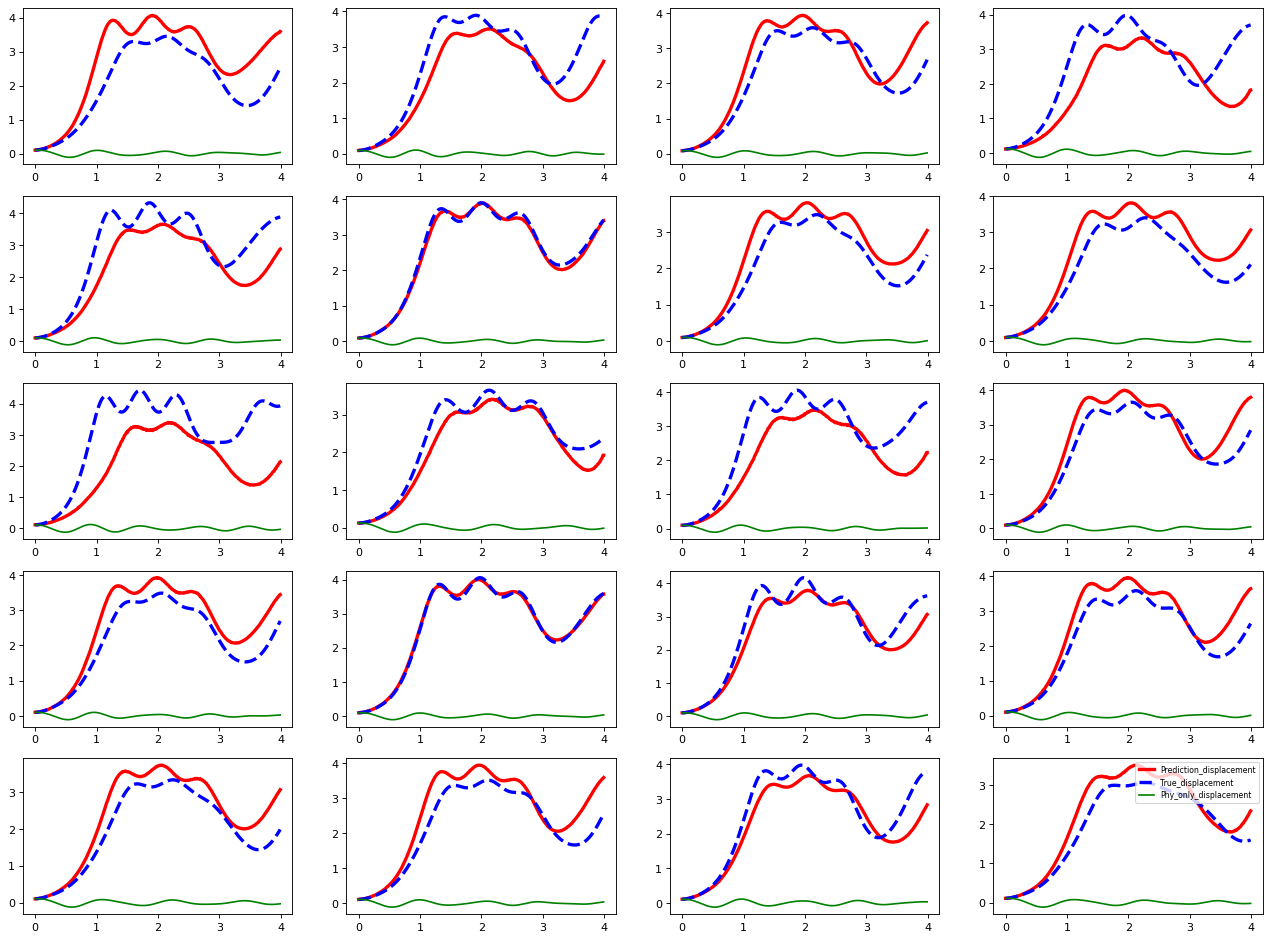

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# show
idx =0
plt.figure()
figure(figsize=(20, 15), dpi=80)

for i in range(20):
    
    plt.subplot(5,4,i+1)
    plt.plot(t,cf_x1[i,:], 'r',linewidth=3,label="Prediction_displacement")
    plt.plot(t,cf_x_true_dis1[i,:], 'b',linestyle='dashed',linewidth=3,label="True_displacement")
    plt.plot(t,cfx1_phy_only[:,i,0], 'g',label="Phy_only_displacement")
    
    #plt.ylim([-2.0, 2.0])
plt.legend(loc='upper right',fontsize=7)
plt.show()

In [ ]:
# calculate mean of n displacement:
# pred
cf_x1_mean = []
cf_x1_T = cf_x1.T
for x in cf_x1_T:
   #print(x.shape)
    cf_x1_mean.append(x.mean())

# true
cf_x1_true_dis_mean =[]
cf_x1_true_dis_T = cf_x_true_dis1.T
for y in cf_x1_true_dis_T:
   #print(x.shape)
    cf_x1_true_dis_mean.append(y.mean())

# phy only
cf_x1_phy_dis_mean =[]
for z in cfx1_phy_only[:,:,0]:
   #print(x.shape)
    cf_x1_phy_dis_mean.append(z.mean())

In [ ]:
# calculate std of n displacement

#pred
cf_x1_std = []
cf_x1_T = cf_x1.T
for x in cf_x1_T:
   #print(x.shape)
    cf_x1_std.append(x.var())

#true
cf_x1_true_dis_std =[]
cf_x1_true_dis_T = cf_x_true_dis1.T
for y in cf_x1_true_dis_T:
   #print(x.shape)
    cf_x1_true_dis_std.append(y.var())

# phy only
cf_x1_phy_dis_std =[]
for z in cfx1_phy_only[:,:,0]:
   #print(x.shape)
    cf_x1_phy_dis_std.append(z.var())


<Figure size 432x288 with 0 Axes>

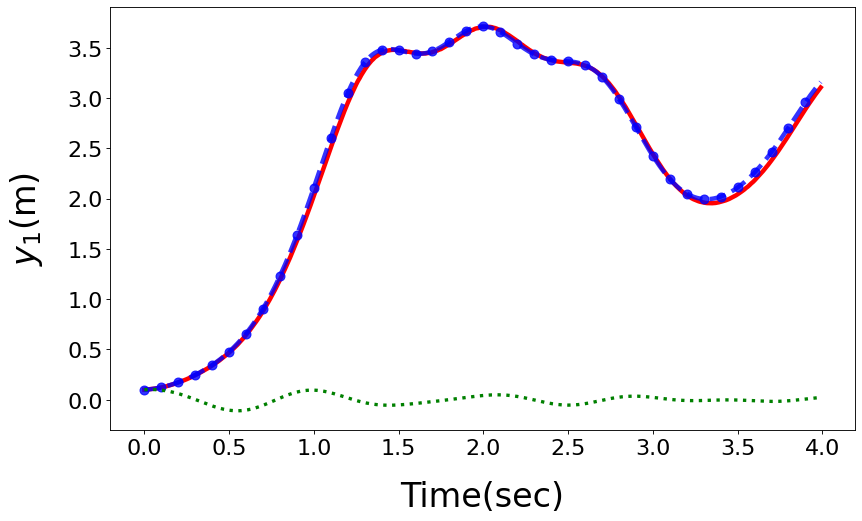

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure()
figure(figsize=(12, 7), dpi=80)


# Plot the means
plt.plot(t, cf_x1_mean, color='red',linewidth=4)#,label="Predicted(mean)")
plt.plot(t,cf_x1_true_dis_mean, color='blue',linestyle='--', linewidth = 4,markevery=10,marker='o',markersize=8,alpha=0.8)#, label="Ground Truth(mean)") #
plt.plot(t,cf_x1_phy_dis_mean, 'g',linewidth = 3,linestyle=':')#,label="Physics only(mean)")



# # Plot the confidence interval
#plt.fill_between(t, (cf_x2_mean-ci_x), (cf_x2_mean+ci_x), color='blue', alpha=0.1)
plt.xlabel("Time(sec)",fontsize = 30, labelpad=20)
plt.ylabel("$y_{1}$(m)",fontsize = 30, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 2.0

plt.show()

<Figure size 432x288 with 0 Axes>

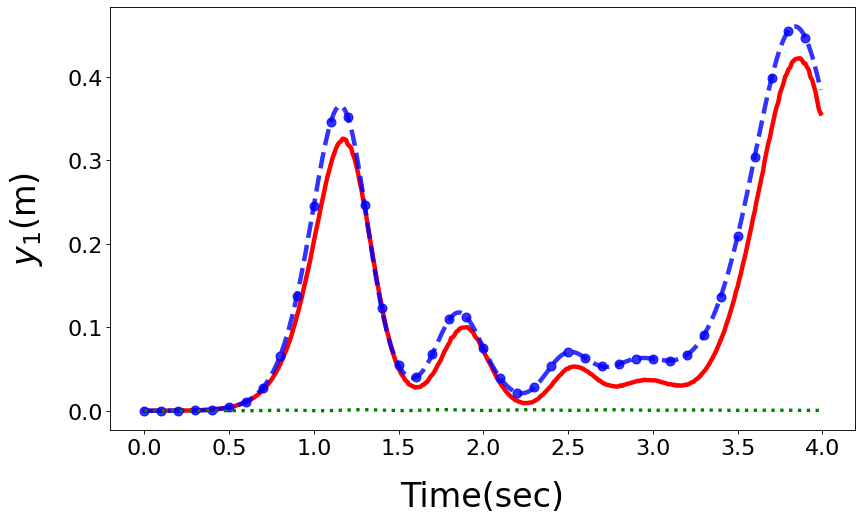

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure()
figure(figsize=(12, 7), dpi=80)

plt.plot(t, cf_x1_std, color='red',linewidth =4)# ,label="Predicted(variance)")
plt.plot(t,cf_x1_true_dis_std,color='blue',linestyle='--', linewidth = 4,markevery=10,marker='o',markersize=8,alpha=0.8)#,label="Ground Truth(variance)")
plt.plot(t,cf_x1_phy_dis_std,color='green',linewidth = 3,linestyle=':')#,label="Physics only(Variance)")


plt.xlabel("Time(sec)",fontsize = 30, labelpad=20)
plt.ylabel("$y_{1}$(m)",fontsize = 30, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3.0
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 432x288 with 0 Axes>

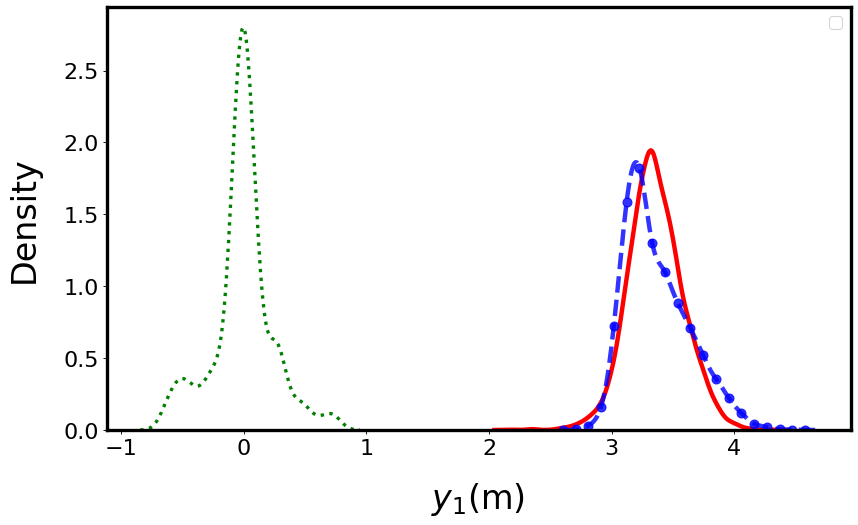

In [ ]:
import seaborn as sns
plt.figure()
figure(figsize=(12, 7), dpi=80)
sns.distplot(a=cf_x1[:,249], kde=True,bins=10,hist = False, kde_kws={"color": "r", "lw": 4})#, label = "Predicted")
sns.distplot(a=cf_x_true_dis1[:,249], kde=True,bins=10,hist = False, kde_kws={"color": "b","linestyle":"--", "lw":4,"marker":'o',"markevery":10,"markersize":8,"alpha":0.8})#, label= "Ground Truth")
sns.distplot(a=cfx1_phy_only[:,249], kde=True,bins=10,hist = False, kde_kws={"linestyle":":","color": "green","lw": 3})#, label= "Physics only")
plt.legend(loc='upper right',fontsize=15)
plt.xlabel("$y_1$(m)",fontsize = 30, labelpad=20)
plt.ylabel("Density",fontsize = 30, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams["axes.edgecolor"] = "black"
# plt.rcParams["axes.linewidth"] = 3.0
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 432x288 with 0 Axes>

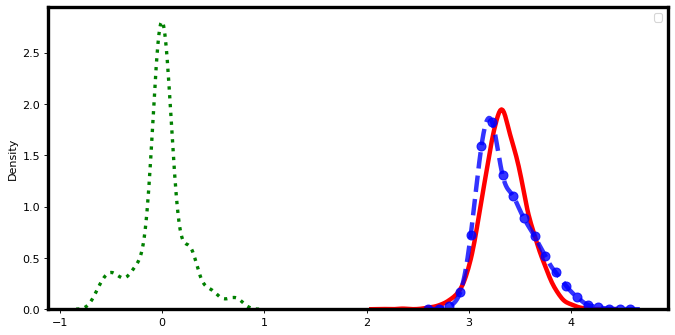

In [ ]:
import seaborn as sns
plt.figure()
figure(figsize=(10, 5), dpi=80)
sns.distplot(a=cf_x1[:,249], kde=True,bins=10,hist = False, kde_kws={"color": "r", "lw": 4})#, label = "Predicted")
sns.distplot(a=cf_x_true_dis1[:,249], kde=True,bins=10,hist = False, kde_kws={"color": "b","linestyle":"--", "lw":4,"marker":'o',"markevery":10,"markersize":8,"alpha":0.8})#, label= "Ground Truth")
sns.distplot(a=cfx1_phy_only[:,249], kde=True,bins=10,hist = False, kde_kws={"linestyle":":","color": "green","lw": 3})#, label= "Physics only")
# plt.plot(t,cf_x2_phy_dis_std,color='white',alpha=0.01,label="Training samples:500")
# plt.plot(t,cf_x2_phy_dis_std,color='white',alpha=0.01,label="Time:2sec")
plt.legend(loc='upper right',fontsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 432x288 with 0 Axes>

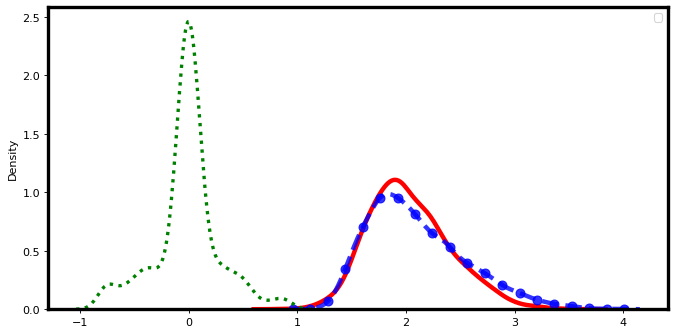

In [ ]:
import seaborn as sns
plt.figure()
figure(figsize=(10, 5), dpi=80)
sns.distplot(a=cf_x1[:,349], kde=True,bins=10,hist = False, kde_kws={"color": "r", "lw": 4})#, label = "Predicted")
sns.distplot(a=cf_x_true_dis1[:,349], kde=True,bins=10,hist = False, kde_kws={"color": "b","linestyle":"--", "lw":4,"marker":'o',"markevery":10,"markersize":8,"alpha":0.8})#, label= "Ground Truth")
sns.distplot(a=cfx1_phy_only[:,349], kde=True,bins=10,hist = False, kde_kws={"linestyle":":","color": "green","lw": 3})#, label= "Physics only")
# plt.plot(t,cf_x2_phy_dis_std,color='white',alpha=0.01,label="Training samples:500")
# plt.plot(t,cf_x2_phy_dis_std,color='white',alpha=0.01,label="Time:2sec")
plt.legend(loc='upper right',fontsize=10)
plt.show()